# Fault Detection in Air Handling Units (AHU)

<b> Objective: <b>
    
1) To determine the predictors of faults in AHUs

<b> Findings: <b>
    
air_temperature__real_value__supply_air_outlet and water_temperature__real_value__heater_behind were determined to be the best predictors for faults in AHUs 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import dataframe_image as dfi
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_excel("data_set_fdd_ahu.xlsx")

In [3]:
data.head()

,Time,signal__required_value__fan_exahust_air,logic__real_value__fan_fresh_air,logic__real_value__air_handling_unit,signal__required_value__heater_valve,water_temperature__required_value__heater,air_temperature__required_value__exahust_air_inlet,logic__required_value__valve_exahust_air_outlet,air_temperature__max__supply_air_outlet,logic__required_value__valve_outdoor_air,...,logic__real_value__fan_exahust_air,logic__required_value__heater,logic__required_value__chiller_pump,logic__required_value__heater_pump,logic__required_value__chiller,signal__required_value__chiller_valve,signal__required_value__fan_fresh_air,equipment,fault,binary_class
0,2019-03-01 00:05:00,0.0,0,0,0.0,0.0,23.0,0,35,0,...,0,0,0,1,0,0.0,0.0,AHU1,no fault,no fault
1,2019-03-01 00:10:00,0.0,0,0,0.0,0.0,23.0,0,35,0,...,0,0,0,1,0,0.0,0.0,AHU1,no fault,no fault
2,2019-03-01 00:15:00,0.0,0,0,0.0,0.0,23.0,0,35,0,...,0,0,0,1,0,0.0,0.0,AHU1,no fault,no fault
3,2019-03-01 00:20:00,0.0,0,0,0.0,0.0,23.0,0,35,0,...,0,0,0,1,0,0.0,0.0,AHU1,no fault,no fault
4,2019-03-01 00:25:00,0.0,0,0,0.0,0.0,23.0,0,35,0,...,0,0,0,1,0,0.0,0.0,AHU1,no fault,no fault


In [4]:
data["fault"].value_counts()

no fault                                                                 191793
Cooling valve is closed during cooling regime                               124
Heating valve is ON during ventilate regime                                 124
Heating pump is ON during ventilate regime                                  123
One of fan differential pressure sensor tubes is disconnected               113
Dampers are closed during cooling regime                                    100
Heating valve is stuck in intermediate position during heating regime        93
Zone outlet temperature sensor indicates 150 °C                              86
Zone inlet temperature sensor indicates 150 °C                               76
Heating valve is stuck in intermediate position during cooling regime        76
Dampers are closed during heating regime                                     75
Heating valve is closed during heating regime                                75
Heating valve is open to the maximum lev

In [5]:
data['fault'].replace(['no fault',
                       'Cooling valve is closed during cooling regime',
                       'Heating valve is ON during ventilate regime',
                       'Heating pump is ON during ventilate regime',
                       'One of fan differential pressure sensor tubes is disconnected',
                       'Dampers are closed during cooling regime',
                       'Heating valve is stuck in intermediate position during heating regime',
                       'Zone outlet temperature sensor indicates 150 °C ',
                       'Heating valve is stuck in intermediate position during cooling regime',
                       'Zone inlet temperature sensor indicates 150 °C',
                       'Dampers are closed during heating regime',
                       'Heating valve is closed during heating regime',
                       'Zone outlet temperature sensor indicates -20 ° C',
                       'Heating valve is open to the maximum level during heating regime',
                       'Cooling pump is ON during heating regime',
                       'Both fan differential pressure sensor tubes are disconnected',
                       'Heating pump is OFF during heating regime',
                       'Fans are OFF during heating regime',
                       'Zone inlet temperature sensor indicates -20 °C',
                       'Heating pump is ON and valve is opened during ventilate regime',
                       'Heat exchanger is closed', 'Quick regimes cycling',
                       'Heating valve is open to the maximum level during cooling regime',
                       'Dampers are closed during ventilate regime'],
                      [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], inplace=True)

In [6]:
data['binary_class'].replace(['no fault',
                       'Cooling valve is closed during cooling regime',
                       'Heating valve is ON during ventilate regime',
                       'Heating pump is ON during ventilate regime',
                       'One of fan differential pressure sensor tubes is disconnected',
                       'Dampers are closed during cooling regime',
                       'Heating valve is stuck in intermediate position during heating regime',
                       'Zone outlet temperature sensor indicates 150 °C ',
                       'Heating valve is stuck in intermediate position during cooling regime',
                       'Zone inlet temperature sensor indicates 150 °C',
                       'Dampers are closed during heating regime',
                       'Heating valve is closed during heating regime',
                       'Zone outlet temperature sensor indicates -20 ° C',
                       'Heating valve is open to the maximum level during heating regime',
                       'Cooling pump is ON during heating regime',
                       'Both fan differential pressure sensor tubes are disconnected',
                       'Heating pump is OFF during heating regime',
                       'Fans are OFF during heating regime',
                       'Zone inlet temperature sensor indicates -20 °C',
                       'Heating pump is ON and valve is opened during ventilate regime',
                       'Heat exchanger is closed', 'Quick regimes cycling',
                       'Heating valve is open to the maximum level during cooling regime',
                       'Dampers are closed during ventilate regime'],
                      [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], inplace=True)

In [7]:
data.head()

,Time,signal__required_value__fan_exahust_air,logic__real_value__fan_fresh_air,logic__real_value__air_handling_unit,signal__required_value__heater_valve,water_temperature__required_value__heater,air_temperature__required_value__exahust_air_inlet,logic__required_value__valve_exahust_air_outlet,air_temperature__max__supply_air_outlet,logic__required_value__valve_outdoor_air,...,logic__real_value__fan_exahust_air,logic__required_value__heater,logic__required_value__chiller_pump,logic__required_value__heater_pump,logic__required_value__chiller,signal__required_value__chiller_valve,signal__required_value__fan_fresh_air,equipment,fault,binary_class
0,2019-03-01 00:05:00,0.0,0,0,0.0,0.0,23.0,0,35,0,...,0,0,0,1,0,0.0,0.0,AHU1,0,0
1,2019-03-01 00:10:00,0.0,0,0,0.0,0.0,23.0,0,35,0,...,0,0,0,1,0,0.0,0.0,AHU1,0,0
2,2019-03-01 00:15:00,0.0,0,0,0.0,0.0,23.0,0,35,0,...,0,0,0,1,0,0.0,0.0,AHU1,0,0
3,2019-03-01 00:20:00,0.0,0,0,0.0,0.0,23.0,0,35,0,...,0,0,0,1,0,0.0,0.0,AHU1,0,0
4,2019-03-01 00:25:00,0.0,0,0,0.0,0.0,23.0,0,35,0,...,0,0,0,1,0,0.0,0.0,AHU1,0,0


In [8]:
# Checking binary class distribution
binary_target = data["binary_class"]
binary_target.value_counts()

0    191793
1      1715
Name: binary_class, dtype: int64

In [9]:
# Checking multi class distribution
multi_target = data["fault"]
multi_target.value_counts()

0     191793
1        124
2        124
3        123
4        113
5        100
6         93
7         86
8         76
9         76
13        75
12        75
11        75
10        75
14        74
15        61
16        57
17        57
18        57
19        52
20        41
21        39
22        38
23        24
Name: fault, dtype: int64

In [10]:
data.isnull().sum()

Time                                                  0
signal__required_value__fan_exahust_air               0
logic__real_value__fan_fresh_air                      0
logic__real_value__air_handling_unit                  0
signal__required_value__heater_valve                  0
water_temperature__required_value__heater             0
air_temperature__required_value__exahust_air_inlet    0
logic__required_value__valve_exahust_air_outlet       0
air_temperature__max__supply_air_outlet               0
logic__required_value__valve_outdoor_air              0
water_temperature__real_value__heater_behind          0
air_temperature__real_value__exahust_air_inlet        0
air_temperature__min__supply_air_outlet               0
air_temperature__real_value__supply_air_outlet        0
water_temperature__real_value__chiller_behind         0
signal__required_value__heat_recovery_bypass          0
water_temperature__real_value__heater_before          0
logic__real_value__fan_exahust_air              

In [11]:
data.shape

(193508, 27)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193508 entries, 0 to 193507
Data columns (total 27 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   Time                                                193508 non-null  datetime64[ns]
 1   signal__required_value__fan_exahust_air             193508 non-null  float64       
 2   logic__real_value__fan_fresh_air                    193508 non-null  int64         
 3   logic__real_value__air_handling_unit                193508 non-null  int64         
 4   signal__required_value__heater_valve                193508 non-null  float64       
 5   water_temperature__required_value__heater           193508 non-null  float64       
 6   air_temperature__required_value__exahust_air_inlet  193508 non-null  float64       
 7   logic__required_value__valve_exahust_air_outlet     193508 non-null  int64         

In [13]:
# Dropping the non numeric and irrelevant features 
data_numeric = data.drop(["Time","equipment"], axis = 1)

In [14]:
pd.set_option("display.max.columns", None)

In [15]:
data_numeric.describe()

,signal__required_value__fan_exahust_air,logic__real_value__fan_fresh_air,logic__real_value__air_handling_unit,signal__required_value__heater_valve,water_temperature__required_value__heater,air_temperature__required_value__exahust_air_inlet,logic__required_value__valve_exahust_air_outlet,air_temperature__max__supply_air_outlet,logic__required_value__valve_outdoor_air,water_temperature__real_value__heater_behind,air_temperature__real_value__exahust_air_inlet,air_temperature__min__supply_air_outlet,air_temperature__real_value__supply_air_outlet,water_temperature__real_value__chiller_behind,signal__required_value__heat_recovery_bypass,water_temperature__real_value__heater_before,logic__real_value__fan_exahust_air,logic__required_value__heater,logic__required_value__chiller_pump,logic__required_value__heater_pump,logic__required_value__chiller,signal__required_value__chiller_valve,signal__required_value__fan_fresh_air,fault,binary_class
count,193508.000000,193508.00000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000,193508.000000
mean,23.941726,0.32763,0.330234,5.126363,7.286591,22.670243,0.330234,31.184096,0.330234,25.494908,22.556979,18.456064,22.590276,22.534848,23.284726,50.058784,0.508201,0.124837,0.145761,0.192411,0.104388,7.124357,32.692395,0.085102,0.008863
std,35.436238,0.46935,0.470299,17.767309,19.434448,0.639504,0.470299,3.400382,0.470299,5.337458,4.742470,2.266921,4.465341,4.761792,41.834712,11.929407,0.499934,0.330535,0.352868,0.394195,0.305765,24.007167,32.119969,1.077077,0.093724
min,0.000000,0.00000,0.000000,0.000000,0.000000,10.000000,0.000000,26.000000,0.000000,12.578380,-20.000000,15.000000,-20.000000,10.462514,0.000000,22.313799,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,22.000000,0.000000,26.000000,0.000000,22.605969,21.559330,15.000000,20.625056,20.358380,0.000000,42.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,23.000000,0.000000,32.000000,0.000000,23.960000,23.448440,19.000000,22.649306,22.176073,0.000000,50.671006,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.500000,0.000000,0.000000
75%,65.000000,1.00000,1.000000,0.000000,0.000000,23.000000,1.000000,35.000000,1.000000,26.371634,24.599553,21.000000,24.570000,23.800125,0.000000,58.082754,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.000000,0.000000
max,100.000000,1.00000,1.000000,100.000000,72.938156,30.000000,1.000000,35.000000,1.000000,66.080112,150.000000,21.000000,150.000000,62.836927,100.000000,87.975419,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,23.000000,1.000000


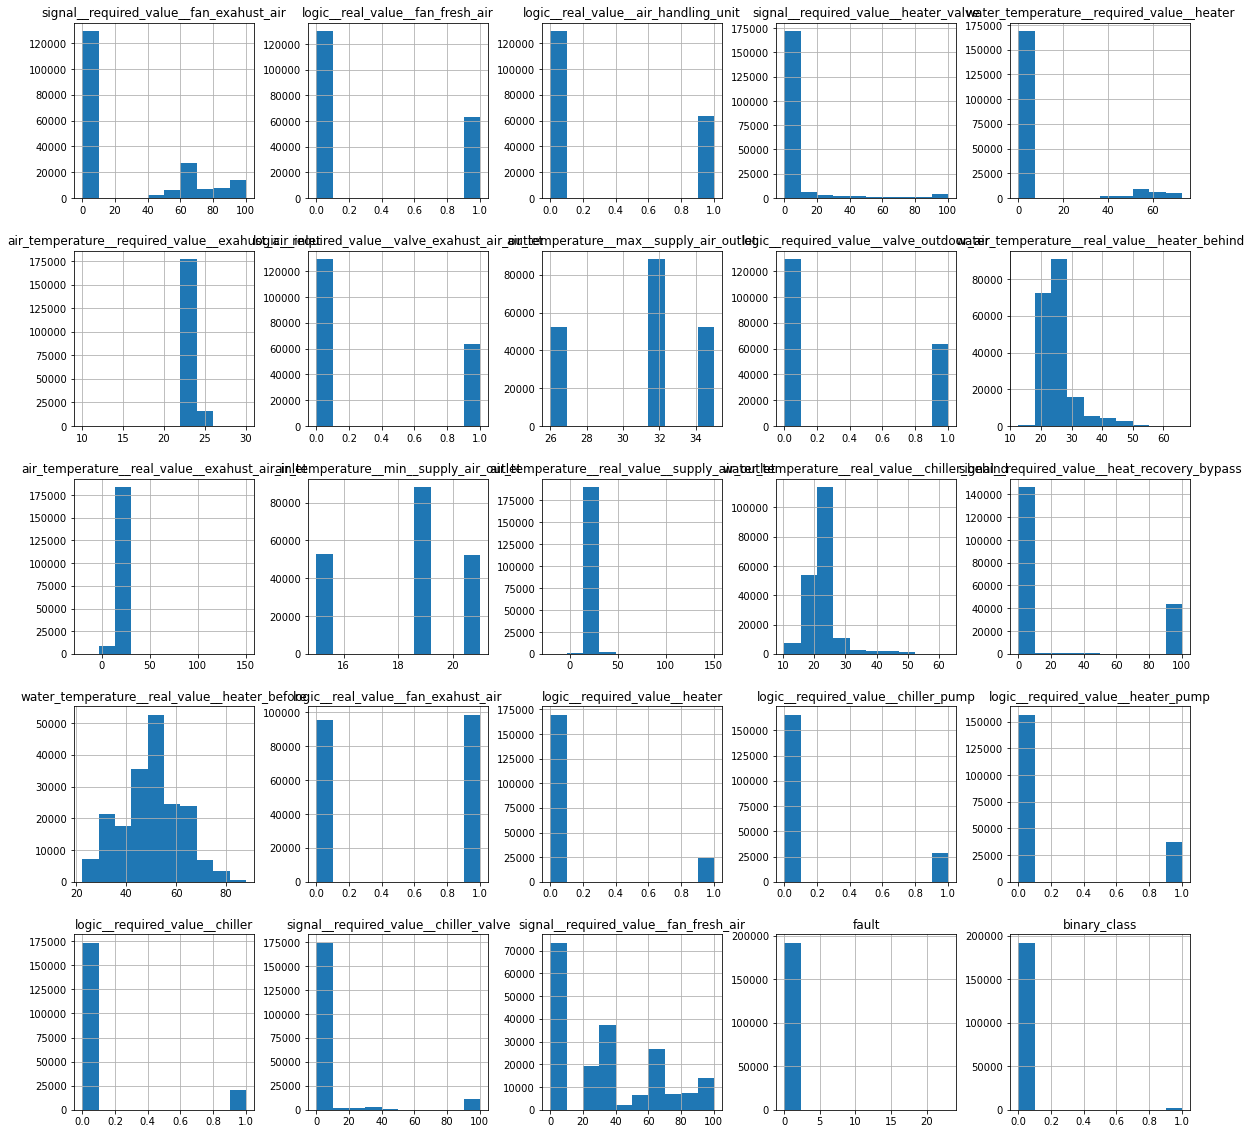

In [17]:
data_numeric.hist(figsize=(20,20))
plt.show()

                                                    signal__required_value__fan_exahust_air  \
signal__required_value__fan_exahust_air                                            1.000000   
logic__real_value__fan_fresh_air                                                   0.953423   
logic__real_value__air_handling_unit                                               0.959185   
signal__required_value__heater_valve                                               0.396209   
water_temperature__required_value__heater                                          0.559709   
air_temperature__required_value__exahust_air_inlet                                -0.098642   
logic__required_value__valve_exahust_air_outlet                                    0.959185   
air_temperature__max__supply_air_outlet                                           -0.024400   
logic__required_value__valve_outdoor_air                                           0.959185   
water_temperature__real_value__heater_behind      

<AxesSubplot:>

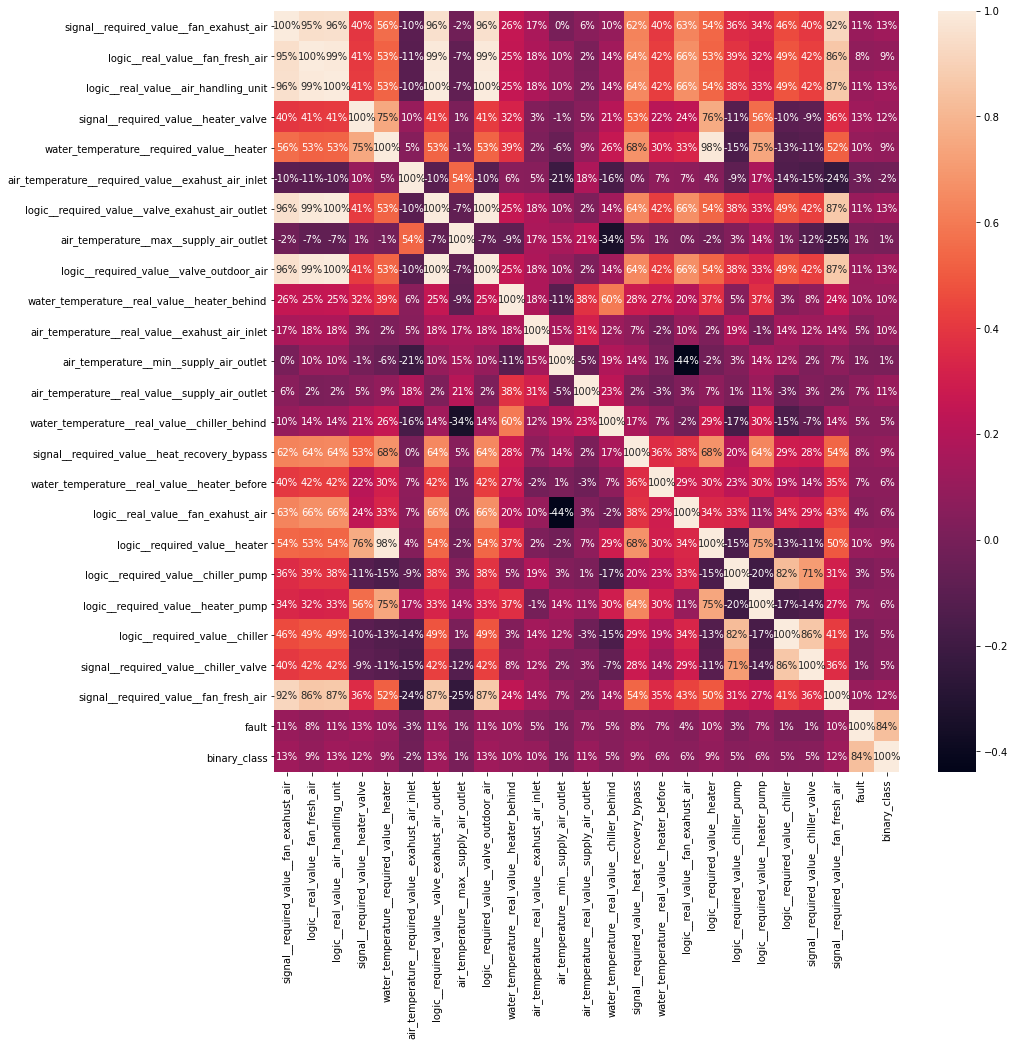

In [17]:
## Showing correlation and checking for collinearity
import seaborn as sns
print(data_numeric.corr())
plt.figure(figsize=(14,14))
sns.heatmap(data_numeric.corr(), annot=True, fmt='.0%')

In [16]:
# Dropping irrelevant feature columns
new_data_numeric = data_numeric.drop(["logic__real_value__fan_fresh_air","logic__real_value__air_handling_unit",
                              "logic__required_value__valve_exahust_air_outlet", "signal__required_value__fan_fresh_air",
                              "logic__required_value__chiller","logic__required_value__valve_outdoor_air","logic__real_value__fan_exahust_air",
                              "logic__required_value__heater","logic__required_value__chiller_pump", "logic__required_value__heater_pump",
                              "fault","binary_class"],
                            axis = 1)

In [17]:
new_data_numeric.head()

,signal__required_value__fan_exahust_air,signal__required_value__heater_valve,water_temperature__required_value__heater,air_temperature__required_value__exahust_air_inlet,air_temperature__max__supply_air_outlet,water_temperature__real_value__heater_behind,air_temperature__real_value__exahust_air_inlet,air_temperature__min__supply_air_outlet,air_temperature__real_value__supply_air_outlet,water_temperature__real_value__chiller_behind,signal__required_value__heat_recovery_bypass,water_temperature__real_value__heater_before,signal__required_value__chiller_valve
0,0.0,0.0,0.0,23.0,35,28.177486,23.459162,21,23.809162,22.129162,0.0,41.345978,0.0
1,0.0,0.0,0.0,23.0,35,28.254860,23.477500,21,23.825810,22.155810,0.0,41.167039,0.0
2,0.0,0.0,0.0,23.0,35,28.349778,23.504889,21,23.844889,22.174889,0.0,41.864396,0.0
3,0.0,0.0,0.0,23.0,35,28.434637,23.538212,21,23.832682,22.199106,0.0,41.822500,0.0
4,0.0,0.0,0.0,23.0,35,28.566034,23.555754,21,23.732737,22.225754,0.0,41.375922,0.0


In [18]:
# One Hot Encode categorical features
one_hot = data_numeric[["logic__required_value__valve_outdoor_air","logic__real_value__fan_exahust_air", "logic__required_value__heater",
                       "logic__required_value__chiller_pump", "logic__required_value__heater_pump"]]

In [19]:
one_hot_encoded = pd.get_dummies(data = one_hot, columns = one_hot.columns, drop_first=True)
one_hot_encoded

,logic__required_value__valve_outdoor_air_1,logic__real_value__fan_exahust_air_1,logic__required_value__heater_1,logic__required_value__chiller_pump_1,logic__required_value__heater_pump_1
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
193503,0,1,0,0,0
193504,0,1,0,0,0
193505,0,1,0,0,0
193506,0,1,0,0,0


In [20]:
# Scaling the data set to normalise it
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(new_data_numeric),columns = new_data_numeric.columns)

In [21]:
# Merging the scaled data with the one_hot_encoded data
merged_data = data_scaled.merge(one_hot_encoded, left_index=True, right_index=True)

In [22]:
merged_data

,signal__required_value__fan_exahust_air,signal__required_value__heater_valve,water_temperature__required_value__heater,air_temperature__required_value__exahust_air_inlet,air_temperature__max__supply_air_outlet,water_temperature__real_value__heater_behind,air_temperature__real_value__exahust_air_inlet,air_temperature__min__supply_air_outlet,air_temperature__real_value__supply_air_outlet,water_temperature__real_value__chiller_behind,signal__required_value__heat_recovery_bypass,water_temperature__real_value__heater_before,signal__required_value__chiller_valve,logic__required_value__valve_outdoor_air_1,logic__real_value__fan_exahust_air_1,logic__required_value__heater_1,logic__required_value__chiller_pump_1,logic__required_value__heater_pump_1
0,-0.67563,-0.288529,-0.374933,0.515647,1.122202,0.502596,0.190235,1.122202,0.272967,-0.085196,-0.55659,-0.730366,-0.29676,0,0,0,0,1
1,-0.67563,-0.288529,-0.374933,0.515647,1.122202,0.517092,0.194102,1.122202,0.276695,-0.079600,-0.55659,-0.745365,-0.29676,0,0,0,0,1
2,-0.67563,-0.288529,-0.374933,0.515647,1.122202,0.534876,0.199877,1.122202,0.280968,-0.075593,-0.55659,-0.686908,-0.29676,0,0,0,0,1
3,-0.67563,-0.288529,-0.374933,0.515647,1.122202,0.550775,0.206904,1.122202,0.278234,-0.070508,-0.55659,-0.690420,-0.29676,0,0,0,0,1
4,-0.67563,-0.288529,-0.374933,0.515647,1.122202,0.575392,0.210603,1.122202,0.255852,-0.064911,-0.55659,-0.727856,-0.29676,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193503,-0.67563,-0.288529,-0.374933,0.515647,0.239945,0.208636,0.931960,-1.524567,0.964940,0.508979,-0.55659,-0.089593,-0.29676,0,1,0,0,0
193504,-0.67563,-0.288529,-0.374933,0.515647,0.239945,0.203968,1.029027,-1.524567,0.981867,0.505471,-0.55659,-0.094622,-0.29676,0,1,0,0,0
193505,-0.67563,-0.288529,-0.374933,0.515647,0.239945,0.200514,1.087243,-1.524567,0.986396,0.501974,-0.55659,-0.106842,-0.29676,0,1,0,0,0
193506,-0.67563,-0.288529,-0.374933,0.515647,0.239945,0.195521,1.122218,-1.524567,0.987896,0.500895,-0.55659,-0.109692,-0.29676,0,1,0,0,0


In [23]:
from sklearn.decomposition import PCA

In [24]:
# Using the PCA to reduce the dimension of the data set to be able to visualise the data
pca = PCA()
pca.fit(merged_data)

PCA()

In [25]:
# Decicide how many features to keep using the sum of combined variance
pca.explained_variance_ratio_

array([2.70268087e-01, 1.33118020e-01, 1.22343484e-01, 1.11218327e-01,
       9.06310358e-02, 6.31180452e-02, 4.80505608e-02, 4.09069507e-02,
       3.01199628e-02, 2.59364043e-02, 2.45708072e-02, 1.52293565e-02,
       1.18409351e-02, 5.62955678e-03, 3.49022293e-03, 2.92690055e-03,
       4.29414862e-04, 1.71928481e-04])

Text(0, 0.5, 'Cumulative explained variance')

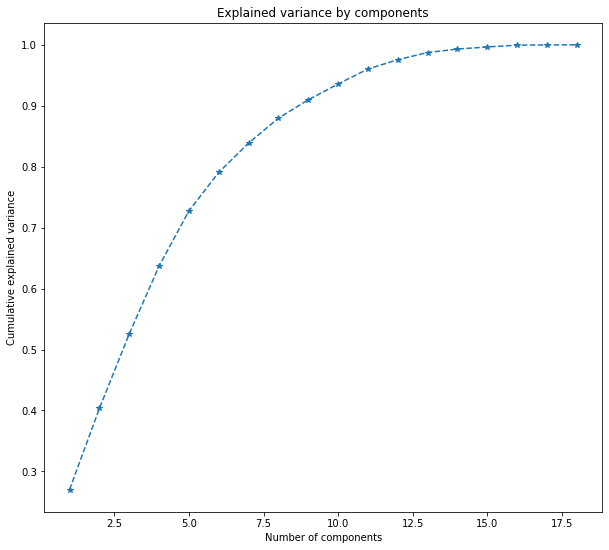

In [26]:
# Plotting the pca.explained_variance_ratio_ to enable me choose the number of components
plt.figure(figsize = (10,9))
plt.plot(range(1,19), pca.explained_variance_ratio_.cumsum(), marker = '*',linestyle = '--')
plt.title("Explained variance by components")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

In [27]:
# From the graph above, we have decided to go with 10 components as it explains above 80% of the cummulative variance
pca = PCA(n_components = 10)

In [28]:
# Fitting the model with the selected number of components
pca.fit(data_scaled)

PCA(n_components=10)

In [29]:
# # Using the pca.transform function to create eigen vectors
pca_results = pca.transform(data_scaled)

In [47]:
print(abs(pca.components_))

[[0.40296366 0.39342021 0.45307259 0.00771241 0.02293808 0.34066594
  0.10707364 0.0220218  0.12484299 0.24168994 0.4327153  0.27500135
  0.1100424 ]
 [0.08264398 0.08529561 0.05072356 0.60709284 0.61578106 0.0293656
  0.20003541 0.08562102 0.31720014 0.21432021 0.0173376  0.0054069
  0.20121468]
 [0.23463654 0.10514739 0.11885422 0.07141679 0.14892107 0.42618399
  0.29114325 0.06038156 0.45966335 0.53720822 0.24465345 0.20455322
  0.14443696]
 [0.25212097 0.29647964 0.27687515 0.12065859 0.17472947 0.07322795
  0.4608862  0.32137802 0.17545438 0.12995093 0.10148665 0.05425463
  0.58720461]
 [0.11310901 0.17310813 0.11809494 0.16037583 0.21211617 0.23165848
  0.11051789 0.76482085 0.17639225 0.13495875 0.12381309 0.15980515
  0.36270317]
 [0.12974005 0.26635698 0.21502973 0.19297009 0.10889903 0.22458388
  0.30090832 0.27619724 0.13354953 0.20972325 0.06083202 0.73018243
  0.03053444]
 [0.06059214 0.00989734 0.03028056 0.08751128 0.16991458 0.08992398
  0.69263782 0.19428192 0.28225411

# Binary Class imbalance using Over Sampling

In [48]:
# Solving binary_class imbalance
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
X_smote, y_smote = over_sample.fit_resample(pca_results,binary_target)
y_smote = pd.Series(y_smote)
y_smote.value_counts()

0    191793
1    191793
Name: binary_class, dtype: int64

# Binary Model Classification using Over Sampling with PCA

In [49]:
# Splitting the data set into train and test by 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42) 

In [50]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(268510, 10) (268510,)
(115076, 10) (115076,)


In [51]:
y_train.value_counts()

1    134274
0    134236
Name: binary_class, dtype: int64

Random Forest

In [52]:
# Fitting the Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
forest.fit(X_train, y_train)
print("The accuracy for the training data set is:",round(forest.score(X_train, y_train)*100,2),"percent")

The accuracy for the training data set is: 100.0 percent


In [53]:
## Selecting the optimal parameters for Random Forest Classifier Model
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

In [54]:
## Fitting the Random Forest Classifier Model with the optimal parameters
from sklearn.model_selection import RandomizedSearchCV
forest_optimal = RandomForestClassifier()
forest_optimal_model = RandomizedSearchCV(estimator = forest_optimal, param_distributions = random_search, n_iter = 25, 
                               cv = 4, verbose= 5, random_state= 42, n_jobs = -1)
forest_optimal_model.fit(X_train,y_train)
print("The accuracy for the training data set is:",round(forest_optimal_model.score(X_train, y_train)*100,2),"percent")

Fitting 4 folds for each of 25 candidates, totalling 100 fits
The accuracy for the training data set is: 99.92 percent


In [55]:
# Random Forest Classifier Model prediction on test data set
predictions = forest_optimal_model.predict(X_test)
predictions

array([1, 1, 0, ..., 0, 1, 0])

In [56]:
# Confusion Matrix for Random Forest Classifier Model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
rf_con_mat = confusion_matrix(y_test, forest_optimal_model.predict(X_test))
rf_con_mat

array([[57309,   248],
       [   32, 57487]])

In [57]:
# Classification report on the accuracy score for Random Forest Classifier Model
print(classification_report(y_test, forest_optimal_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57557
           1       1.00      1.00      1.00     57519

    accuracy                           1.00    115076
   macro avg       1.00      1.00      1.00    115076
weighted avg       1.00      1.00      1.00    115076



Decision Tree

In [58]:
# Fitting the Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print("The accuracy for the training data set is",acc_decision_tree, "Percent")

The accuracy for the training data set is 100.0 Percent


In [59]:
## Selecting the optimal parameters of the Decision Tree Classifier Model and fitting the model
from sklearn.model_selection import GridSearchCV
from sklearn import tree
parameters = {'max_depth':range(1,50)}
decision_tree_1 = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=3)
decision_tree_1.fit(X_train, y_train)
acc_decision_tree_1 = round(decision_tree_1.score(X_train, y_train) * 100, 2)
tree_model = decision_tree_1.best_estimator_
print("The accuracy for the training data set is",acc_decision_tree_1)

The accuracy for the training data set is 100.0


In [60]:
# Prediction on the test data for decision tree classifier model
decision_tree_pred = decision_tree_1.predict(X_test)
decision_tree_pred

array([1, 1, 0, ..., 0, 1, 0])

In [61]:
# Confusion matrix on decision tree classifier model
confusion_matrix(y_test, decision_tree_1.predict(X_test))

array([[57187,   370],
       [  175, 57344]])

In [62]:
# Classification report for Decision Tree Classifier on test data
print(classification_report(y_test, decision_tree_1.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     57557
           1       0.99      1.00      1.00     57519

    accuracy                           1.00    115076
   macro avg       1.00      1.00      1.00    115076
weighted avg       1.00      1.00      1.00    115076



SVC

In [63]:
# Support Vector Machine Classifer Model
from sklearn.svm import SVC, LinearSVC
svc = SVC(kernel = "linear", random_state = 42)
svc.fit(X_train,y_train)
accuracy = round(svc.score(X_train,y_train)*100,2)
print("The accuracy for the training data set is:",round(svc.score(X_train,y_train)*100,2), "percent")

The accuracy for the training data set is: 84.11 percent


In [64]:
## Selecting the optimal parameters for the Support Vector Machines Classifier Model
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"C":[0.5,1,10,100],
    "gamma":["scale",1,0.1,0.01,0.001,0.0001],
    "kernel":["rbf"],}
]

optimal_svc = GridSearchCV(
SVC(),
param_grid,
cv = 5,
scoring = "accuracy"
)

optimal_svc.fit(X_train, y_train)
print(optimal_svc.best_params_)

KeyboardInterrupt: 

In [65]:
## Fitting the Support Vector Machines Classifier Model with the optimal parameters
from sklearn.svm import SVC, LinearSVC
svc = SVC(kernel = "rbf",C= 100, gamma = 0.01, random_state = 42)
svc.fit(X_train,y_train)
accuracy_optimal = round(svc.score(X_train,y_train)*100,2)
print("The accuracy for the optimal model is:",round(svc.score(X_train,y_train)*100,2), "percent")

The accuracy for the optimal model is: 96.53 percent


In [66]:
# Prediction on the test data for support vector classifier model
svc_pred = svc.predict(X_test)
svc_pred

array([1, 1, 0, ..., 0, 1, 0])

In [67]:
# Confusion matrix on support vector classifier model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
confusion_matrix(y_test, svc.predict(X_test))

array([[54196,  3361],
       [  622, 56897]])

In [68]:
# Classification report forsupport vector Classifier on test data
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     57557
           1       0.94      0.99      0.97     57519

    accuracy                           0.97    115076
   macro avg       0.97      0.97      0.97    115076
weighted avg       0.97      0.97      0.97    115076



LSTM

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout 

In [36]:
# Convert x_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [37]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(268510, 10, 1)

In [38]:
# Convert x_train and y_train to numpy arrays
X_test, y_test = np.array(X_test), np.array(y_test)

In [39]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(115076, 10, 1)

In [44]:
# Building the LSTM Model
model = Sequential()
model.add(LSTM(units = 120, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.3))

model.add(LSTM(units = 30, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.4))

model.add(LSTM(units = 15, activation = "sigmoid", return_sequences = False))
model.add(Dropout(0.5))

model.add(Dense(1))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 120)           58560     
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 120)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 60)            43440     
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 10, 30)            10920     
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 30)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 15)               

In [46]:
# Compile the model
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics=['accuracy'])

In [47]:
model.fit(X_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
8391/8391 [==============================] - 136s 16ms/step - loss: 0.6814 - accuracy: 0.7598
Epoch 2/20
8391/8391 [==============================] - 133s 16ms/step - loss: 0.5253 - accuracy: 0.8204
Epoch 3/20
8391/8391 [==============================] - 153s 18ms/step - loss: 0.5355 - accuracy: 0.8164
Epoch 4/20
8391/8391 [==============================] - 140s 17ms/step - loss: 0.5683 - accuracy: 0.8062
Epoch 5/20
8391/8391 [==============================] - 129s 15ms/step - loss: 0.5674 - accuracy: 0.7746
Epoch 6/20
8391/8391 [==============================] - 122s 15ms/step - loss: 0.5877 - accuracy: 0.7450
Epoch 7/20
8391/8391 [==============================] - 120s 14ms/step - loss: 0.5405 - accuracy: 0.8059
Epoch 8/20
8391/8391 [==============================] - 120s 14ms/step - loss: 0.5784 - accuracy: 0.8063
Epoch 9/20
8391/8391 [==============================] - 124s 15ms/step - loss: 0.6600 - accuracy: 0.7569
Epoch 10/20
8391/8391 [==============================] 

In [48]:
# Evaluating the base line model
model.evaluate(X_train,y_train)

8391/8391 [==============================] - 36s 4ms/step - loss: 0.6795 - accuracy: 0.8117


[0.679470956325531, 0.8117313981056213]

In [49]:
test_loss, test_acc = model.evaluate(X_test, y_test)

3597/3597 [==============================] - 17s 5ms/step - loss: 0.6794 - accuracy: 0.8131


In [50]:
Predictions = model.predict(X_test)
Predictions

array([[0.5168052 ],
       [0.51650506],
       [0.5168052 ],
       ...,
       [0.49412644],
       [0.51650506],
       [0.49412644]], dtype=float32)

In [51]:
# Converting the sigmoid output values to the original classes
predicted_output =np.where(Predictions == Predictions.max(axis=1)[:, np.newaxis], 1, 0)
predicted_output

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
print(classification_report(y_test, predicted_output))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     57557
           1       0.50      1.00      0.67     57519

    accuracy                           0.50    115076
   macro avg       0.25      0.50      0.33    115076
weighted avg       0.25      0.50      0.33    115076



/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hyper-Parameter Tuning

In [53]:
import keras_tuner as tf
from tensorflow import keras
from keras_tuner import RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
np.random.seed(42)

In [54]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int("num_of_layers", 2, 20)):
        model.add(layers.Dense(units = hp.Int("units",
                                 min_value = 32,
                                 max_value = 512,
                                 step = 16),
                        activation = "relu"))
    
    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5))),
    model.add(layers.Dense(1, activation = "linear")),
    model.compile(
        optimizer = keras.optimizers.Adam(
            hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss = "binary_crossentropy",
        metrics = ["accuracy"])
    return model

In [55]:
tuner = tf.RandomSearch(
    build_model,
    objective="accuracy",
    max_trials=10,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="Thesis_1",
)

In [59]:
tuner.search(X_train, y_train,
             epochs=15, batch_size = 32,
             validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [60]:
tuner.results_summary(1)

Results summary
Results in my_dir/Thesis_1
Showing 1 best trials
Objective(name='accuracy', direction='max')
Trial summary
Hyperparameters:
num_of_layers: 15
units: 416
dropout_rate: 0.2646209257335742
learning_rate: 0.0001
Score: 0.5815733671188354


In [62]:
# Building the LSTM Model
model = Sequential()
model.add(LSTM(units = 320, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.41))

model.add(LSTM(units = 320, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.41))

model.add(LSTM(units = 320, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.41))

model.add(LSTM(units = 320, activation = "softmax", return_sequences = False))
model.add(Dropout(0.41))

model.add(Dense(1))

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 320)           412160    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 320)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 320)           820480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 320)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 320)           820480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 320)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 320)              

In [64]:
# Compile the model
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics=['accuracy'])

In [65]:
model.fit(X_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
8391/8391 [==============================] - 1003s 119ms/step - loss: 0.5503 - accuracy: 0.7529
Epoch 2/20
8391/8391 [==============================] - 1125s 134ms/step - loss: 0.3596 - accuracy: 0.8632
Epoch 3/20
8391/8391 [==============================] - 1140s 136ms/step - loss: 0.3653 - accuracy: 0.8819
Epoch 4/20
8391/8391 [==============================] - 1133s 135ms/step - loss: 0.2609 - accuracy: 0.9257
Epoch 5/20
8391/8391 [==============================] - 1011s 121ms/step - loss: 0.2833 - accuracy: 0.9154
Epoch 6/20
8391/8391 [==============================] - 1047s 125ms/step - loss: 1.2660 - accuracy: 0.8617
Epoch 7/20
8391/8391 [==============================] - 1065s 127ms/step - loss: 1.0632 - accuracy: 0.8781
Epoch 8/20
8391/8391 [==============================] - 1069s 127ms/step - loss: 0.3025 - accuracy: 0.9161
Epoch 9/20
8391/8391 [==============================] - 1057s 126ms/step - loss: 0.2588 - accuracy: 0.9306
Epoch 10/20
8391/8391 [==============

In [66]:
# Evaluating the base line model
model.evaluate(X_train,y_train)

8391/8391 [==============================] - 298s 35ms/step - loss: 0.5316 - accuracy: 0.8273


[0.5316037535667419, 0.8273137211799622]

In [67]:
Predictions = model.predict(X_test)

In [68]:
# Converting the sigmoid output values to the original classes
predicted_output =np.where(Predictions == Predictions.max(axis=1)[:, np.newaxis], 1, 0)

In [69]:
print(classification_report(y_test, predicted_output))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     57557
           1       0.50      1.00      0.67     57519

    accuracy                           0.50    115076
   macro avg       0.25      0.50      0.33    115076
weighted avg       0.25      0.50      0.33    115076



/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Multi class Imbalance with SMOTE

In [30]:
# Solving multi_class imbalance
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
X_smote, y_smote = over_sample.fit_resample(pca_results,multi_target)
y_smote = pd.Series(y_smote)
y_smote.value_counts()

0     191793
1     191793
22    191793
21    191793
20    191793
19    191793
18    191793
17    191793
16    191793
15    191793
14    191793
13    191793
12    191793
11    191793
10    191793
9     191793
8     191793
7     191793
6     191793
5     191793
4     191793
3     191793
2     191793
23    191793
Name: fault, dtype: int64

# Model Building (Multi Class Classification) using Over Sampling with PCA

In [31]:
# Splitting the data set into train and test by 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [32]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3222122, 10) (3222122,)
(1380910, 10) (1380910,)


In [21]:
from sklearn.decomposition import PCA

In [22]:
# Using the PCA to reduce the dimension of the data set to be able to visualise the data
pca = PCA()
pca.fit(data_scaled)

PCA()

In [23]:
# Decicide how many features to keep using the sum of combined variance
pca.explained_variance_ratio_

array([0.28068212, 0.12437488, 0.1121505 , 0.09170871, 0.07765777,
       0.06493281, 0.04744713, 0.04382697, 0.03854172, 0.0346762 ,
       0.02913435, 0.0186493 , 0.01197193, 0.00937451, 0.0080237 ,
       0.00470059, 0.00173186, 0.00041497])

Text(0, 0.5, 'Cumulative explained variance')

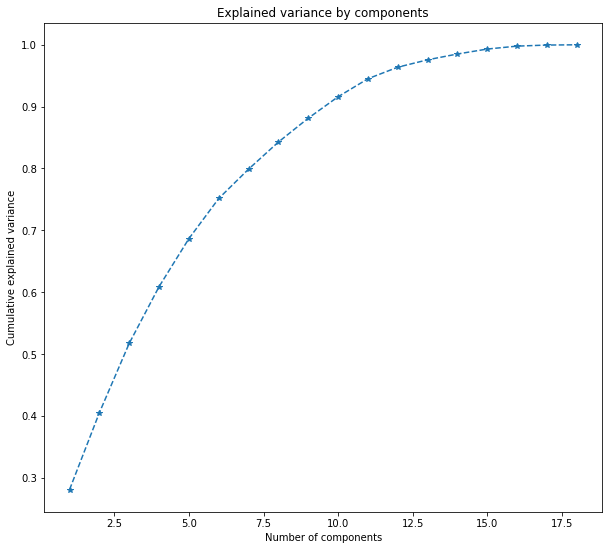

In [24]:
# Plotting the pca.explained_variance_ratio_ to enable me choose the number of components
plt.figure(figsize = (10,9))
plt.plot(range(1,19), pca.explained_variance_ratio_.cumsum(), marker = '*',linestyle = '--')
plt.title("Explained variance by components")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

In [25]:
# From the graph above, I have decided to go with 10 components as it explains above 80% of the cummulative variance
pca = PCA(n_components = 10)

In [26]:
# Fitting the model with the selected number of components
pca.fit(data_scaled)

PCA(n_components=10)

In [27]:
# # Using the pca.transform function to create eigen vectors
pca_results = pca.transform(data_scaled)

In [28]:
# Splitting the data set into train and test by 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_results, y_smote, test_size=0.3, random_state=42)

In [29]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3222122, 10) (3222122,)
(1380910, 10) (1380910,)


Random Forest

In [73]:
# Fitting the Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
forest.fit(X_train, y_train)
print("The accuracy for the training data set is:",round(forest.score(X_train, y_train)*100,2),"percent")

The accuracy for the training data set is: 100.0 percent


In [83]:
## Selecting the optimal parameters for Random Forest Classifier Model
# random_search = {'criterion': ['entropy', 'gini'],
#                'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
#                'max_features': ['auto', 'sqrt','log2', None],
#                'min_samples_leaf': [4, 6, 8, 12],
#                'min_samples_split': [5, 7, 10, 14],
#                'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

In [74]:
random_search = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

In [75]:
## Fitting the Random Forest Classifier Model with the optimal parameters
from sklearn.model_selection import RandomizedSearchCV
forest_optimal = RandomForestClassifier()
forest_optimal_model = RandomizedSearchCV(estimator = forest_optimal, param_distributions = random_search, n_iter = 5, 
                               cv = 5, verbose= 5, random_state= 42, n_jobs = -1)
forest_optimal_model.fit(X_train,y_train)
print("The accuracy for the training data set is:",round(forest_optimal_model.score(X_train, y_train)*100,2),"percent")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
The accuracy for the training data set is: 83.58 percent


In [76]:
# Random Forest Classifier Model prediction on test data set
predictions = forest_optimal_model.predict(X_test)
predictions

array([15, 18,  9, ..., 21,  5,  8])

In [77]:
# Confusion Matrix for Random Forest Classifier Model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
rf_con_mat = confusion_matrix(y_test, forest_optimal_model.predict(X_test))
rf_con_mat

array([[38607,  2563,   182,  3080,  1257,   439,   344,     1,  2152,
            0,   121,   261,     0,  1612,  1249,  2767,   972,   134,
            0,   102,  1319,     6,    98,   273],
       [  118, 54635,  1696,     0,     0,   670,     0,     0,   670,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    0, 15923, 33951,     0,     0,   457,     0,     0,  1672,
            0,     0,     0,     0,     0,     0,  4458,     0,    80,
            0,   918,     0,     0,     0,     0],
       [    0,     0,     0, 57425,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0, 37800,     0,     0,     0,     0,
            0,     0,     0,     0,    30,     0,  9896,     0,     0,
            0,     0,  9572,     0,     0,   164],
       [  472,  5412,  6302,    63,

In [78]:
# Classification report on the accuracy score for Random Forest Classifier Model
print(classification_report(y_test, forest_optimal_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80     57539
           1       0.58      0.95      0.72     57789
           2       0.80      0.59      0.68     57459
           3       0.93      1.00      0.97     57425
           4       0.95      0.66      0.78     57462
           5       0.94      0.47      0.63     57405
           6       0.99      0.58      0.73     57540
           7       1.00      0.99      1.00     57532
           8       0.67      0.74      0.70     57463
           9       1.00      1.00      1.00     57219
          10       0.98      0.34      0.50     57450
          11       0.98      0.93      0.96     57501
          12       1.00      1.00      1.00     57484
          13       0.58      0.92      0.71     57894
          14       0.92      0.84      0.88     57629
          15       0.73      0.99      0.84     57375
          16       0.55      0.78      0.65     57428
          17       0.85    

In [ ]:
results_rf = pd.DataFrame(forest_optimal_model.predict(X_test), columns = ["Faults"])

In [ ]:
results_rf['Faults'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
                             ['no fault',
                              'Cooling valve is closed during cooling regime',
                              'Heating valve is ON during ventilate regime',
                              'Heating pump is ON during ventilate regime',
                              'One of fan differential pressure sensor tubes is disconnected',
                              'Dampers are closed during cooling regime',
                              'Heating valve is stuck in intermediate position during heating regime',
                              'Zone outlet temperature sensor indicates 150 °C ',
                              'Heating valve is stuck in intermediate position during cooling regime',
                              'Zone inlet temperature sensor indicates 150 °C',
                              'Dampers are closed during heating regime',
                              'Heating valve is closed during heating regime',
                              'Zone outlet temperature sensor indicates -20 ° C',
                              'Heating valve is open to the maximum level during heating regime',
                              'Cooling pump is ON during heating regime',
                              'Both fan differential pressure sensor tubes are disconnected',
                              'Heating pump is OFF during heating regime',
                              'Fans are OFF during heating regime',
                              'Zone inlet temperature sensor indicates -20 °C',
                              'Heating pump is ON and valve is opened during ventilate regime',
                              'Heat exchanger is closed', 'Quick regimes cycling',
                              'Heating valve is open to the maximum level during cooling regime',
                              'Dampers are closed during ventilate regime'], inplace=True)

In [ ]:
results_rf.value_counts()

In [190]:
type(results_rf)

pandas.core.frame.DataFrame

In [191]:
results_rf.index

RangeIndex(start=0, stop=58053, step=1)

In [138]:
results_rf

,Faults
0,no fault
1,no fault
2,no fault
3,no fault
4,no fault
...,...
58048,no fault
58049,no fault
58050,no fault
58051,no fault


In [111]:
# Scaling the data set to normalise it
from sklearn import preprocessing
results_rf = pd.DataFrame(preprocessing.scale(results_rf.value_counts()),columns = results_rf.columns)

In [113]:
results_rf

,Faults
0,3.162277
1,-0.315291
2,-0.315411
3,-0.315411
4,-0.316072
5,-0.316312
6,-0.316372
7,-0.316672
8,-0.316792
9,-0.316973


In [124]:
results_rf['Faults'].replace([3.162277,-0.315291,-0.315411,-0.315411,-0.316072,-0.316312,-0.316372,-0.316672,-0.316792,-0.316973,-0.316973],
                             ['no fault',
                              'Zone inlet temperature sensor indicates 150 °C',
                              'Zone outlet temperature sensor indicates 150 °C',
                              'Zone outlet temperature sensor indicates -20 ° C',
                              'Zone inlet temperature sensor indicates -20 °C',
                              'Dampers are closed during cooling regime',
                              'Heating pump is ON and valve is opened during ventilate regime',
                              'Fans are OFF during heating regime',
                              'Quick regimes cycling',
                              'Dampers are closed during heating regime',
                              'Cooling pump is ON during heating regime'], inplace=True)

In [ ]:
results_rf['Faults'].replace([3.162277,-0.315291,-0.315411,-0.315411,-0.316072,-0.316312,-0.316372,-0.316672,-0.316792,-0.316973,-0.316973],
                             ['no fault',
                              'Zone inlet temperature sensor indicates 150 °C',
                              'Zone outlet temperature sensor indicates 150 °C',
                              'Zone outlet temperature sensor indicates -20 ° C',
                              'Zone inlet temperature sensor indicates -20 °C',
                              'Dampers are closed during cooling regime',
                              'Heating pump is ON and valve is opened during ventilate regime',
                              'Fans are OFF during heating regime',
                              'Quick regimes cycling',
                              'Dampers are closed during heating regime',
                              'Cooling pump is ON during heating regime'], inplace=True)

In [122]:
results_rf['Faults'].replace(['Zone inlet temperature sensor indicates 150 °C',
                              'Zone outlet temperature sensor indicates 150 °C',
                              'Zone outlet temperature sensor indicates -20 ° C',
                              'Zone inlet temperature sensor indicates -20 °C',
                              'Dampers are closed during cooling regime',
                              'Heating pump is ON and valve is opened during ventilate regime',
                              'Fans are OFF during heating regime',
                              'Quick regimes cycling',
                              'Dampers are closed during heating regime',
                              'Cooling pump is ON during heating regime'],
                             [1,2,3,4,5,6,7,8,9,10], inplace=True)

In [125]:
results_rf

,Faults
0,3.162277
1,-0.315291
2,-0.315411
3,-0.315411
4,-0.316072
5,-0.316312
6,-0.316372
7,-0.316672
8,-0.316792
9,-0.316973


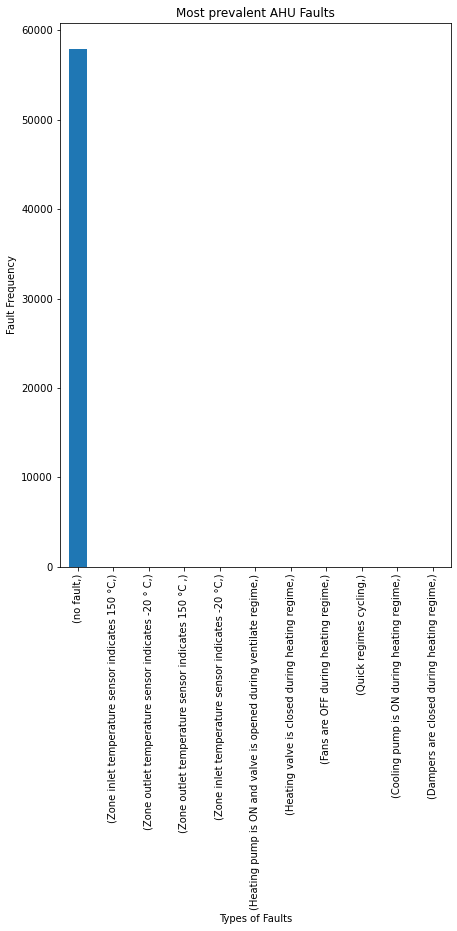

In [139]:
plt.figure(figsize = (7,10))
results_rf.value_counts().plot.bar()
plt.title("Frequent AHU Faults")
ylabel("Fault Frequency")
xlabel("Types of Faults")
plt.savefig('Fault Frequency.png',dpi=600)

In [188]:
# Bar Chart Feature Importance Decision Tree 
importances = pd.DataFrame({'Random Forest Features':X_train.shape[0],'Importances Score':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('Importances Score',ascending=False).set_index('Random Forest Features')

In [176]:
len(data_scaled)

193508

In [187]:
forest.feature_importances_

array([0.13667502, 0.11199518, 0.08034761, 0.08292858, 0.07372543,
       0.06523657, 0.0896424 , 0.15932678, 0.0860659 , 0.11405654])

In [183]:
len(X_test)

58053

In [189]:
importances[:15]

,Importances Score
Random Forest Features,
135455,0.159
135455,0.137
135455,0.114
135455,0.112
135455,0.090
135455,0.086
135455,0.083
135455,0.080
135455,0.074


In [ ]:
# Bar Chart Feature Importance Decison Tree 
plt.figure(figsize = (20,15))
importances.plot.bar()

Decision Tree

In [79]:
# Fitting the Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print("The accuracy for the training data set is",acc_decision_tree, "Percent")

The accuracy for the training data set is 100.0 Percent


In [33]:
## Selecting the optimal parameters of the Decision Tree Classifier Model and fitting the model
from sklearn.model_selection import GridSearchCV
from sklearn import tree
parameters = {'max_depth':range(1,50)}
decision_tree_1 = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=3)
decision_tree_1.fit(X_train, y_train)
acc_decision_tree_1 = round(decision_tree_1.score(X_train, y_train) * 100, 2)
tree_model = decision_tree_1.best_estimator_
print("The accuracy for the training data set is",acc_decision_tree_1)

The accuracy for the training data set is 100.0


In [34]:
# Prediction on the test data for decision tree classifier model
decision_tree_pred = decision_tree_1.predict(X_test)
decision_tree_pred

array([ 5, 18,  9, ..., 21,  5,  8])

In [35]:
# Confusion matrix on decision tree classifier model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
confusion_matrix(y_test, decision_tree_1.predict(X_test))

array([[57199,    28,    17,     9,    32,    11,    19,     2,     6,
            4,    22,    22,     0,    10,    46,    17,    31,    13,
           12,     2,    21,    12,     4,     0],
       [    5, 57784,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    6,     0, 57453,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    1,     0,     0, 57424,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    4,     0,     0,     0, 57454,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     3,     0,     0,
            1,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,

In [36]:
# Classification report for Decision Tree Classifier on test data
print(classification_report(y_test, decision_tree_1.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     57539
           1       1.00      1.00      1.00     57789
           2       1.00      1.00      1.00     57459
           3       1.00      1.00      1.00     57425
           4       1.00      1.00      1.00     57462
           5       1.00      1.00      1.00     57405
           6       1.00      1.00      1.00     57540
           7       1.00      1.00      1.00     57532
           8       1.00      1.00      1.00     57463
           9       1.00      1.00      1.00     57219
          10       1.00      1.00      1.00     57450
          11       1.00      1.00      1.00     57501
          12       1.00      1.00      1.00     57484
          13       1.00      1.00      1.00     57894
          14       1.00      1.00      1.00     57629
          15       1.00      1.00      1.00     57375
          16       1.00      1.00      1.00     57428
          17       1.00    

In [39]:
# Bar Chart Feature Importance Decision Tree 
importances = pd.DataFrame({'Decision Tree Features':X_train[0],'Importances Score':np.round(decision_tree_1.feature_importances_,3)})
importances = importances.sort_values('Importances Score',ascending=False).set_index('Decision Tree Features')

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [45]:
decision_tree_1.best_estimator_.feature_importances_

array([0.04957392, 0.07969349, 0.094034  , 0.17394215, 0.05976778,
       0.08746491, 0.13964411, 0.17326688, 0.01787394, 0.12473882])

In [ ]:
# Bar Chart Feature Importance Decison Tree 
plt.figure(figsize = (20,15))
importances.plot.bar()

In [ ]:
# Scaling the data set to normalise it
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(X_smote),columns = new_data.columns)

SVC

In [ ]:
# Support Vector Machine Classifer Model
from sklearn.svm import SVC, LinearSVC
svc = SVC(kernel = "linear", random_state = 42)
svc.fit(X_train,y_train)
accuracy = round(svc.score(X_train,y_train)*100,2)
print("The accuracy for the training data set is:",round(svc.score(X_train,y_train)*100,2), "percent")

In [72]:
## Selecting the optimal parameters for the Support Vector Machines Classifier Model
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"C":[0.5,1,10,100],
    "gamma":["scale",1,0.1,0.01,0.001,0.0001],
    "kernel":["rbf"],}
]

optimal_svc = GridSearchCV(
SVC(),
param_grid,
cv = 5,
scoring = "accuracy"
)

optimal_svc.fit(X_train, y_train)
print(optimal_svc.best_params_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
## Fitting the Support Vector Machines Classifier Model with the optimal parameters
svc = SVC(kernel = "rbf",C= 100, gamma = 1, random_state = 42)
svc.fit(X_train,y_train)
accuracy_optimal = round(svc.score(X_train,y_train)*100,2)
print("The accuracy for the optimal model is:",round(svc.score(X_train,y_train)*100,2), "percent")

In [ ]:
# Prediction on the test data for support vector classifier model
svc_pred = svc.predict(X_test)
svc_pred

In [ ]:
# Confusion matrix on support vector classifier model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
confusion_matrix(y_test, svc.predict(X_test))

In [ ]:
# Classification report forsupport vector Classifier on test data
print(classification_report(y_test, svc.predict(X_test)))

In [389]:
results_svc = pd.DataFrame(svc.predict(X_test), columns = ["Faults"])
results_svc.value_counts()

Faults
0         57876
9            29
12           27
7            26
11           21
14           20
18           17
19           16
22           12
23            7
21            2
dtype: int64

In [390]:
results_svc.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
                             ['no fault',
                              'Cooling valve is closed during cooling regime',
                              'Heating valve is ON during ventilate regime',
                              'Heating pump is ON during ventilate regime',
                              'One of fan differential pressure sensor tubes is disconnected',
                              'Dampers are closed during cooling regime',
                              'Heating valve is stuck in intermediate position during heating regime',
                              'Zone outlet temperature sensor indicates 150 °C ',
                              'Heating valve is stuck in intermediate position during cooling regime',
                              'Zone inlet temperature sensor indicates 150 °C',
                              'Dampers are closed during heating regime',
                              'Heating valve is closed during heating regime',
                              'Zone outlet temperature sensor indicates -20 ° C',
                              'Heating valve is open to the maximum level during heating regime',
                              'Cooling pump is ON during heating regime',
                              'Both fan differential pressure sensor tubes are disconnected',
                              'Heating pump is OFF during heating regime',
                              'Fans are OFF during heating regime',
                              'Zone inlet temperature sensor indicates -20 °C',
                              'Heating pump is ON and valve is opened during ventilate regime',
                              'Heat exchanger is closed', 'Quick regimes cycling',
                              'Heating valve is open to the maximum level during cooling regime',
                              'Dampers are closed during ventilate regime'], inplace=True)

In [391]:
results_svc.value_counts()

Faults                                                          
no fault                                                            57876
Zone inlet temperature sensor indicates 150 °C                         29
Zone outlet temperature sensor indicates -20 ° C                       27
Zone outlet temperature sensor indicates 150 °C                        26
Heating valve is closed during heating regime                          21
Cooling pump is ON during heating regime                               20
Zone inlet temperature sensor indicates -20 °C                         17
Heating pump is ON and valve is opened during ventilate regime         16
Heating valve is open to the maximum level during cooling regime       12
Dampers are closed during ventilate regime                              7
Quick regimes cycling                                                   2
dtype: int64

In [392]:
dt = results_svc.value_counts().to_frame()

In [393]:
dt = dt.reset_index()

In [394]:
dt

,Faults,0
0,no fault,57876
1,Zone inlet temperature sensor indicates 150 °C,29
2,Zone outlet temperature sensor indicates -20 ° C,27
3,Zone outlet temperature sensor indicates 150 °C,26
4,Heating valve is closed during heating regime,21
5,Cooling pump is ON during heating regime,20
6,Zone inlet temperature sensor indicates -20 °C,17
7,Heating pump is ON and valve is opened during ...,16
8,Heating valve is open to the maximum level dur...,12
9,Dampers are closed during ventilate regime,7


In [395]:
dt=dt.rename(columns = {0:'Values'})

In [396]:
dt = dt.drop([dt.index[0]])

In [397]:
dt = dt.sort_values("Values", ascending = True)

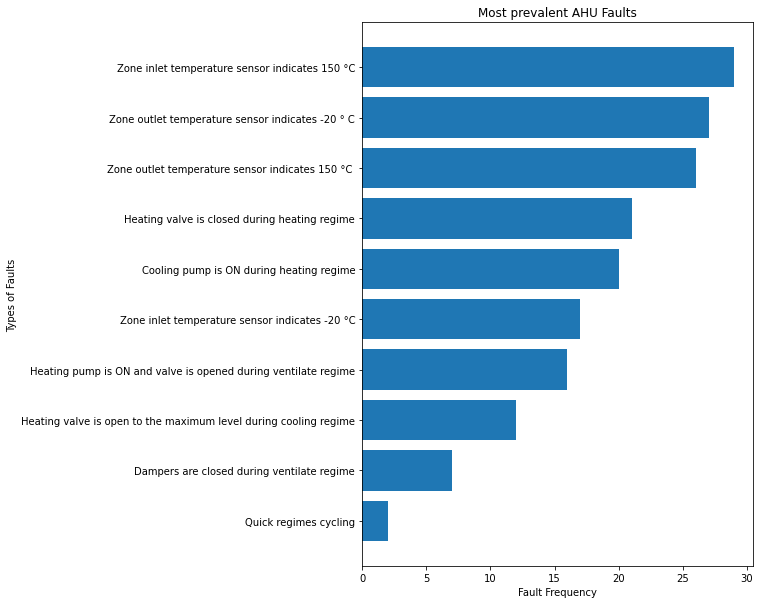

In [398]:
plt.figure(figsize = (7,10))
plt.barh(dt["Faults"],dt["Values"])
plt.title("Most prevalent AHU Faults")
ylabel("Types of Faults")
xlabel("Fault Frequency")
plt.savefig('Fault Frequency.png',dpi=600)

In [400]:
## Getting the coefficients from Support Vector Machine Classifier
svc.coef_trans = np.array(svc.coef_)

In [401]:
## Converting the coefficients to one dimension
svc_optimal_one_dim = svc.coef_trans.ravel()
svc_optimal_one_dim

array([-5.83517314e-04, -1.40141773e-03,  2.08263256e-04, ...,
       -6.64876917e-02,  2.88603229e-01, -3.36186144e-02])

In [403]:
## Extracting the feature names
columns = new_data.columns
columns

Index(['signal__required_value__fan_exahust_air',
       'signal__required_value__heater_valve',
       'water_temperature__required_value__heater',
       'air_temperature__required_value__exahust_air_inlet',
       'air_temperature__max__supply_air_outlet',
       'logic__required_value__valve_outdoor_air',
       'water_temperature__real_value__heater_behind',
       'air_temperature__real_value__exahust_air_inlet',
       'air_temperature__min__supply_air_outlet',
       'air_temperature__real_value__supply_air_outlet',
       'water_temperature__real_value__chiller_behind',
       'signal__required_value__heat_recovery_bypass',
       'water_temperature__real_value__heater_before',
       'logic__real_value__fan_exahust_air', 'logic__required_value__heater',
       'logic__required_value__chiller_pump',
       'logic__required_value__heater_pump',
       'signal__required_value__chiller_valve'],
      dtype='object')

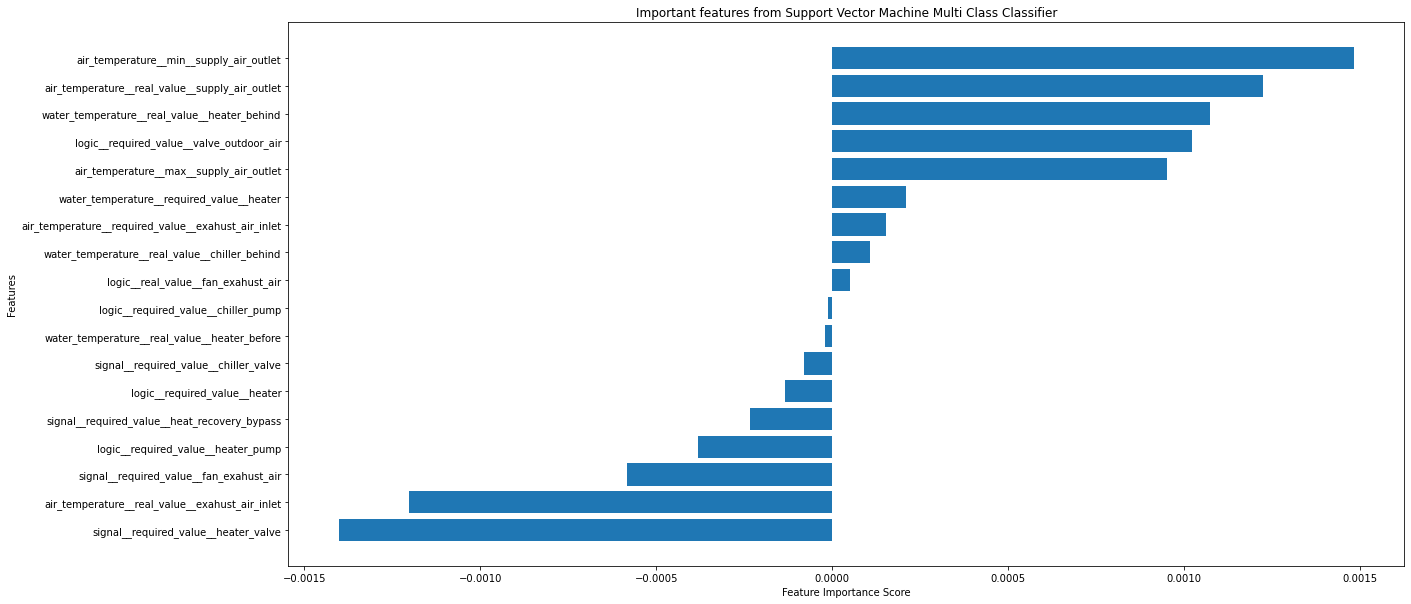

In [405]:
## Plotting the features using the below function
def f_importances(coef, columns):
    imp = coef
    imp,columns = zip(*sorted(zip(imp,columns)))
    plt.barh(range(len(columns)), imp, align='center')
    plt.yticks(range(len(columns)), columns)
    plt.title("Important features from Support Vector Machine Multi Class Classifier")
    xlabel("Feature Importance Score")
    ylabel("Features")
    plt.show()
plt.figure(figsize = (20,10))
features_names = columns
# svc_optimal = SVC(kernel = "linear",C= 100, gamma = 0.0001, random_state = 42)
# svc_optimal.fit(X_train,y_train)
f_importances(svc_optimal_one_dim,columns)

In [ ]:
# Feature Importance Random Forest 
important = features_names
important = pd.DataFrame({'Support Vector Machine Classifier':X_train.columns,'Importance Score':np.round(svc_optimal_one_dim,3)})
important = important.sort_values("Importance Score",ascending=False)

In [ ]:
## Selecting the top 15 features that influence employee attrition
important[:3]

LSTM

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout 

In [ ]:
# Solving binary_class imbalance
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
X_smote, y_smote = over_sample.fit_resample(new_data,multi_target)
y_smote = pd.Series(y_smote)
y_smote.value_counts()

In [ ]:
# encode class values as integers
import tensorflow as tf
y_smote = tf.keras.utils.to_categorical(y_smote,num_classes=None, dtype='float32')
y_smote

In [ ]:
# Scaling the data set to normalise it
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(X_smote),columns = new_data.columns)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Using the PCA to reduce the dimension of the data set to be able to visualise the data
pca = PCA()
pca.fit(data_scaled)

In [ ]:
# Decicide how many features to keep using the sum of combined variance
pca.explained_variance_ratio_

In [ ]:
# Plotting the pca.explained_variance_ratio_ to enable me choose the number of components
plt.figure(figsize = (10,9))
plt.plot(range(1,19), pca.explained_variance_ratio_.cumsum(), marker = '*',linestyle = '--')
plt.title("Explained variance by components")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

In [ ]:
# From the graph above, I have decided to go with 10 components as it explains above 80% of the cummulative variance
pca = PCA(n_components = 10)

In [ ]:
# Fitting the model with the selected number of components
pca.fit(data_scaled)

In [ ]:
# # Using the pca.transform function to create eigen vectors
pca_results = pca.transform(data_scaled)

In [ ]:
# Splitting the data set into train and test by 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_results, y_smote, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

In [ ]:
# Convert x_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

In [ ]:
# Convert x_train and y_train to numpy arrays
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

In [82]:
# Building the LSTM Model
model = Sequential()
model.add(LSTM(units = 50, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = "softmax", return_sequences = False))
model.add(Dropout(0.5))

model.add(Dense(24))

In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 10, 50)            10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 10, 60)            26640     
_________________________________________________________________
dropout_9 (Dropout)          (None, 10, 60)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 10, 80)            45120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 10, 80)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 120)              

In [84]:
# Compile the model
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=['accuracy'])

In [85]:
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
100692/100692 [==============================] - 1839s 18ms/step - loss: -171.8982 - accuracy: 0.0411
Epoch 2/50
100692/100692 [==============================] - 1665s 17ms/step - loss: -175.3413 - accuracy: 0.0417
Epoch 3/50
100692/100692 [==============================] - 1503s 15ms/step - loss: -175.3436 - accuracy: 0.0417
Epoch 4/50
100692/100692 [==============================] - 1504s 15ms/step - loss: -175.3431 - accuracy: 0.0417
Epoch 5/50
100692/100692 [==============================] - 1503s 15ms/step - loss: -175.3422 - accuracy: 0.0417
Epoch 6/50
100692/100692 [==============================] - 1504s 15ms/step - loss: -175.3425 - accuracy: 0.0417
Epoch 7/50
100692/100692 [==============================] - 1512s 15ms/step - loss: -175.3443 - accuracy: 0.0417
Epoch 8/50
100692/100692 [==============================] - 1506s 15ms/step - loss: -175.3430 - accuracy: 0.0417
Epoch 9/50
100692/100692 [==============================] - 1504s 15ms/step - loss: -175.3420 - 

KeyboardInterrupt: 

In [ ]:
# Evaluating the base line model
model.evaluate(X_train,y_train)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

In [ ]:
Predictions = model.predict(X_test)

In [ ]:
# Converting the sigmoid output values to the original classes
predicted_output =np.where(Predictions == Predictions.max(axis=1)[:, np.newaxis], 1, 0)

In [ ]:
print(classification_report(y_test, predicted_output))

In [ ]:
Hyper-Parameter Tuning

In [ ]:
import keras_tuner as tf
from tensorflow import keras
from keras_tuner import RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
np.random.seed(42)

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int("num_of_layers", 2, 20)):
        model.add(layers.Dense(units = hp.Int("units",
                                 min_value = 32,
                                 max_value = 512,
                                 step = 16),
                        activation = "relu"))
    
    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5))),
    model.add(layers.Dense(1, activation = "linear")),
    model.compile(
        optimizer = keras.optimizers.Adam(
            hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss = "binary_crossentropy",
        metrics = ["accuracy"])
    return model

In [ ]:
tuner = tf.RandomSearch(
    build_model,
    objective="binary_crossentropy",
    max_trials=10,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="Thesis",
)

In [ ]:
tuner.search(x_train, y_train,
             epochs=15, batch_size = 32,
             validation_data=(x_test, y_test))

In [ ]:
tuner.results_summary(1)

In [ ]:
# Building the LSTM Model
model = Sequential()
model.add(LSTM(units = 320, activation = "relu", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.41))

model.add(LSTM(units = 320, activation = "relu", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.41))

model.add(LSTM(units = 320, activation = "relu", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.41))

model.add(LSTM(units = 320, activation = "softmax", return_sequences = False))
model.add(Dropout(0.41))

model.add(Dense(24))

In [ ]:
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=50)

In [ ]:
# Evaluating the base line model
model.evaluate(X_train,y_train)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

In [ ]:
Predictions = model.predict(X_test)

In [ ]:
# Converting the sigmoid output values to the original classes
predicted_output =np.where(Predictions == Predictions.max(axis=1)[:, np.newaxis], 1, 0)

In [ ]:
print(classification_report(y_test, predicted_output))

# Class imbalance using Under Sampling Binary

In [75]:
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(sampling_strategy= "all")
X_smote, y_smote = under_sample.fit_resample(merged_data, binary_target,)
y_smote = pd.Series(y_smote)
y_smote.value_counts()

0    1184
1    1184
Name: binary_class, dtype: int64

# Binary Class Under Sampling without PCA

In [73]:
# Splitting the data set into train and test by 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42) 

In [74]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(135455, 18) (135455,)
(58053, 18) (58053,)


# Model Building (Binary Classification) Under Sampling

Random Forest

In [82]:
# Fitting the Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
forest.fit(X_train, y_train)
print("The accuracy for the training data set is:",round(forest.score(X_train, y_train)*100,2),"percent")

The accuracy for the training data set is: 100.0 percent


In [83]:
## Selecting the optimal parameters for Random Forest Classifier Model
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

In [84]:
## Fitting the Random Forest Classifier Model with the optimal parameters
from sklearn.model_selection import RandomizedSearchCV
forest_optimal = RandomForestClassifier()
forest_optimal_model = RandomizedSearchCV(estimator = forest_optimal, param_distributions = random_search, n_iter = 50, 
                               cv = 4, verbose= 5, random_state= 42, n_jobs = -1)
forest_optimal_model.fit(X_train,y_train)
print("The accuracy for the training data set is:",round(forest_optimal_model.score(X_train, y_train)*100,2),"percent")

Fitting 4 folds for each of 50 candidates, totalling 200 fits
The accuracy for the training data set is: 99.92 percent


In [85]:
# Random Forest Classifier Model prediction on test data set
predictions = forest_optimal_model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
# Converting the sigmoid output values to the original classes
# predicted_output =np.where(predictions == predictions.max(axis=1)[:, np.newaxis], 1, 0)
# predicted_output

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]])

In [86]:
# Confusion Matrix for Random Forest Classifier Model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
rf_con_mat = confusion_matrix(y_test, forest_optimal_model.predict(X_test))
rf_con_mat

array([[57505,    17],
       [  127,   404]])

In [87]:
# Classification report on the accuracy score for Random Forest Classifier Model
print(classification_report(y_test, forest_optimal_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57522
           1       0.96      0.76      0.85       531

    accuracy                           1.00     58053
   macro avg       0.98      0.88      0.92     58053
weighted avg       1.00      1.00      1.00     58053



Decision Tree

In [88]:
# Fitting the Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print("The accuracy for the training data set is",acc_decision_tree, "Percent")

The accuracy for the training data set is 100.0 Percent


In [89]:
## Selecting the optimal parameters of the Decision Tree Classifier Model and fitting the model
from sklearn.model_selection import GridSearchCV
from sklearn import tree
parameters = {'max_depth':range(1,100)}
decision_tree_1 = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=-1)
decision_tree_1.fit(X_train, y_train)
acc_decision_tree_1 = round(decision_tree_1.score(X_train, y_train) * 100, 2)
tree_model = decision_tree_1.best_estimator_
print("The accuracy for the training data set is",acc_decision_tree_1,"Percent")

The accuracy for the training data set is 100.0 Percent


In [90]:
# Prediction on the test data for decision tree classifier model
decision_tree_pred = decision_tree_1.predict(X_test)
decision_tree_pred

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
# Confusion matrix on decision tree classifier model
confusion_matrix(y_test, decision_tree_1.predict(X_test))

array([[57416,   106],
       [  103,   428]])

In [92]:
# Classification report for Decision Tree Classifier on test data
print(classification_report(y_test, decision_tree_1.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57522
           1       0.80      0.81      0.80       531

    accuracy                           1.00     58053
   macro avg       0.90      0.90      0.90     58053
weighted avg       1.00      1.00      1.00     58053



SVC

In [76]:
# Support Vector Machine Classifer Model
from sklearn.svm import SVC, LinearSVC
svc = SVC(kernel = "linear", random_state = 42)
svc.fit(X_train,y_train)
accuracy = round(svc.score(X_train,y_train)*100,2)
print("The accuracy for the training data set is:",round(svc.score(X_train,y_train)*100,2), "percent")

The accuracy for the training data set is: 99.13 percent


In [77]:
## Selecting the optimal parameters for the Support Vector Machines Classifier Model
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"C":[0.5,1,10,100],
    "gamma":["scale",1,0.1,0.01,0.001,0.0001],
    "kernel":["rbf","linear"],}
]

optimal_svc = GridSearchCV(
SVC(),
param_grid,
cv = 5,
scoring = "accuracy"
)

optimal_svc.fit(X_train, y_train)
print(optimal_svc.best_params_)

KeyboardInterrupt: 

In [78]:
## Fitting the Support Vector Machines Classifier Model with the optimal parameters
svc_optimal = SVC(kernel = "rbf",C= 10, gamma = 0.1, random_state = 42)
svc_optimal.fit(X_train,y_train)
accuracy_optimal = round(svc_optimal.score(X_train,y_train)*100,2)
print("The accuracy for the optimal model is:",round(svc_optimal.score(X_train,y_train)*100,2), "percent")

The accuracy for the optimal model is: 99.65 percent


In [79]:
# Confusion matrix on decision tree classifier model
confusion_matrix(y_test, svc_optimal.predict(X_test))

array([[57512,    10],
       [  217,   314]])

In [80]:
# Classification report for Decision Tree Classifier on test data
print(classification_report(y_test, svc_optimal.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57522
           1       0.97      0.59      0.73       531

    accuracy                           1.00     58053
   macro avg       0.98      0.80      0.87     58053
weighted avg       1.00      1.00      1.00     58053



LSTM

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout 

In [50]:
# Convert x_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [51]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2401, 18, 1)

In [52]:
# Convert x_train and y_train to numpy arrays
X_test, y_test = np.array(X_test), np.array(y_test)

In [53]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(1029, 18, 1)

In [54]:
# Building the LSTM Model
model = Sequential()
model.add(LSTM(units = 180, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 90, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.3))

model.add(LSTM(units = 30, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.4))

model.add(LSTM(units = 15, activation = "sigmoid", return_sequences = False))
model.add(Dropout(0.5))

model.add(Dense(1))

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 18, 180)           131040    
_________________________________________________________________
dropout (Dropout)            (None, 18, 180)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 18, 90)            97560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 90)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 18, 30)            14520     
_________________________________________________________________
dropout_2 (Dropout)          (None, 18, 30)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 15)                2

In [56]:
# Compile the model
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics=['accuracy'])

In [57]:
model.fit(X_train, y_train, batch_size=20, epochs=50)

Epoch 1/50
121/121 [==============================] - 7s 24ms/step - loss: 3.7718 - accuracy: 0.5706
Epoch 2/50
121/121 [==============================] - 3s 22ms/step - loss: 3.1650 - accuracy: 0.5664
Epoch 3/50
121/121 [==============================] - 3s 26ms/step - loss: 3.1363 - accuracy: 0.4981
Epoch 4/50
121/121 [==============================] - 3s 27ms/step - loss: 3.2994 - accuracy: 0.4865
Epoch 5/50
121/121 [==============================] - 3s 28ms/step - loss: 3.3871 - accuracy: 0.5127
Epoch 6/50
121/121 [==============================] - 3s 28ms/step - loss: 3.4675 - accuracy: 0.5044
Epoch 7/50
121/121 [==============================] - 3s 28ms/step - loss: 3.2796 - accuracy: 0.5065
Epoch 8/50
121/121 [==============================] - 3s 28ms/step - loss: 3.4344 - accuracy: 0.4890
Epoch 9/50
121/121 [==============================] - 3s 28ms/step - loss: 3.1955 - accuracy: 0.4835
Epoch 10/50
121/121 [==============================] - 4s 32ms/step - loss: 2.8898 - accura

In [58]:
# Evaluating the base line model
model.evaluate(X_train,y_train)

76/76 [==============================] - 1s 9ms/step - loss: 0.6898 - accuracy: 0.5077


[0.6897663474082947, 0.5077051520347595]

In [59]:
test_loss, test_acc = model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.4820


In [60]:
Predictions = model.predict(X_test)
Predictions

array([[0.5336678 ],
       [0.5383676 ],
       [0.53050864],
       ...,
       [0.5294646 ],
       [0.53439796],
       [0.5336688 ]], dtype=float32)

In [61]:
# Converting the sigmoid output values to the original classes
predicted_output =np.where(Predictions == Predictions.max(axis=1)[:, np.newaxis], 1, 0)
predicted_output

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [62]:
# Confusion Matrix for LSTM Model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
print(classification_report(y_test, predicted_output))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       533
           1       0.48      1.00      0.65       496

    accuracy                           0.48      1029
   macro avg       0.24      0.50      0.33      1029
weighted avg       0.23      0.48      0.31      1029



/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hyper-Parameter Tuning

In [63]:
import keras_tuner as tf
from tensorflow import keras
from keras_tuner import RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
np.random.seed(42)

In [65]:
tuner = tf.RandomSearch(
    build_model,
    objective="accuracy",
    max_trials=10,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="Thesis",
)

In [66]:
tuner.search(X_train, y_train,
             epochs=15, batch_size = 32,
             validation_data=(X_test, y_test))

Trial 10 Complete [00h 00m 14s]
accuracy: 0.6117936670780182

Best accuracy So Far: 0.6204128563404083
Total elapsed time: 00h 06m 57s
INFO:tensorflow:Oracle triggered exit


In [67]:
tuner.results_summary(1)

Results summary
Results in my_dir/Thesis
Showing 1 best trials
Objective(name='accuracy', direction='max')
Trial summary
Hyperparameters:
num_of_layers: 6
units: 224
dropout_rate: 0.17429970946509116
learning_rate: 0.001
Score: 0.6204128563404083


In [68]:
# Building the LSTM Model
model = Sequential()
model.add(LSTM(units = 224, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.17))

model.add(LSTM(units = 224, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.17))

model.add(LSTM(units = 224, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.17))

model.add(LSTM(units = 224, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.17))

model.add(LSTM(units = 224, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.17))

model.add(LSTM(units = 224, activation = "softmax", return_sequences = False))
model.add(Dropout(0.17))

model.add(Dense(1))

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 18, 224)           202496    
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 224)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 18, 224)           402304    
_________________________________________________________________
dropout_2 (Dropout)          (None, 18, 224)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 18, 224)           402304    
_________________________________________________________________
dropout_3 (Dropout)          (None, 18, 224)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 18, 224)          

In [70]:
# Compile the model
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics=['accuracy'])

In [71]:
reduce_lr = ReduceLROnPlateau(monitor='lr', factor=0.2,
                              patience=5, min_lr=0.001)

In [72]:
# Training the model
model.fit(X_train, y_train, batch_size=32, epochs=50, callbacks=[reduce_lr])

Epoch 1/50
76/76 [==============================] - 13s 111ms/step - loss: 1.4523 - accuracy: 0.4923
Epoch 2/50
76/76 [==============================] - 9s 120ms/step - loss: 1.0934 - accuracy: 0.4923
Epoch 3/50
76/76 [==============================] - 9s 122ms/step - loss: 0.9649 - accuracy: 0.4923
Epoch 4/50
76/76 [==============================] - 9s 119ms/step - loss: 0.9065 - accuracy: 0.4923
Epoch 5/50
76/76 [==============================] - 11s 152ms/step - loss: 1.0026 - accuracy: 0.4923
Epoch 6/50
76/76 [==============================] - 10s 131ms/step - loss: 1.1170 - accuracy: 0.4923
Epoch 7/50
76/76 [==============================] - 9s 124ms/step - loss: 0.8321 - accuracy: 0.4923
Epoch 8/50
76/76 [==============================] - 10s 135ms/step - loss: 0.8538 - accuracy: 0.4923
Epoch 9/50
76/76 [==============================] - 9s 120ms/step - loss: 0.8553 - accuracy: 0.4761
Epoch 10/50
76/76 [==============================] - 11s 149ms/step - loss: 0.8350 - accuracy: 0

In [73]:
model.evaluate(X_test,y_test)

33/33 [==============================] - 2s 43ms/step - loss: 0.6936 - accuracy: 0.5180


[0.6936215162277222, 0.5179786086082458]

In [74]:
model.evaluate(X_train,y_train)

76/76 [==============================] - 4s 46ms/step - loss: 0.6979 - accuracy: 0.4923


[0.6979056596755981, 0.49229487776756287]

# Model Building Multi Class Classification Under Sampling

In [194]:
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(sampling_strategy= "all")
X_smote, y_smote = under_sample.fit_resample(merged_data,multi_target)
y_smote = pd.Series(y_smote)
y_smote.value_counts()

0     17
1     17
22    17
21    17
20    17
19    17
18    17
17    17
16    17
15    17
14    17
13    17
12    17
11    17
10    17
9     17
8     17
7     17
6     17
5     17
4     17
3     17
2     17
23    17
Name: fault, dtype: int64

In [192]:
# Splitting the data set into train and test by 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42) 

In [193]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(135455, 18) (135455,)
(58053, 18) (58053,)


In [20]:
y_smote.shape

(576,)

In [21]:
# Scaling the data set to normalise it
# from sklearn import preprocessing
# data_scaled = pd.DataFrame(preprocessing.scale(X_smote),columns = new_data.columns)

Random Forest

In [195]:
# Fitting the Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
forest.fit(X_train, y_train)
print("The accuracy for the training data set is:",round(forest.score(X_train, y_train)*100,2),"percent")

The accuracy for the training data set is: 100.0 percent


In [196]:
## Selecting the optimal parameters for Random Forest Classifier Model
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

In [197]:
## Fitting the Random Forest Classifier Model with the optimal parameters
from sklearn.model_selection import RandomizedSearchCV
forest_optimal = RandomForestClassifier()
forest_optimal_model = RandomizedSearchCV(estimator = forest_optimal, param_distributions = random_search, n_iter = 25, 
                               cv = 4, verbose= 5, random_state= 42, n_jobs = -1)
forest_optimal_model.fit(X_train,y_train)
print("The accuracy for the training data set is:",round(forest_optimal_model.score(X_train, y_train)*100,2),"percent")

Fitting 4 folds for each of 25 candidates, totalling 100 fits
The accuracy for the training data set is: 99.89 percent


In [198]:
# Random Forest Classifier Model prediction on test data set
predictions = forest_optimal_model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [199]:
# Confusion Matrix for Random Forest Classifier Model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
rf_con_mat = confusion_matrix(y_test, forest_optimal_model.predict(X_test))
rf_con_mat

array([[57501,     4,     2,     2,     5,     0,     0,     1,     2,
            0,     0,     0,     0,     2,     0,     2,     0,     0,
            0,     0,     1,     0,     0,     0],
       [   11,    22,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [   16,     1,    22,     0,     0,     1,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    5,     0,     0,    27,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    8,     0,     0,     0,    21,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    6,     0,     0,     0,

In [200]:
# Classification report on the accuracy score for Random Forest Classifier Model
print(classification_report(y_test, forest_optimal_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57522
           1       0.81      0.67      0.73        33
           2       0.92      0.55      0.69        40
           3       0.93      0.84      0.89        32
           4       0.81      0.72      0.76        29
           5       0.95      0.78      0.86        27
           6       1.00      0.77      0.87        31
           7       0.96      0.92      0.94        26
           8       0.89      0.68      0.77        25
           9       1.00      1.00      1.00        29
          10       1.00      0.72      0.84        29
          11       1.00      0.88      0.93        24
          12       1.00      1.00      1.00        27
          13       0.91      0.91      0.91        23
          14       1.00      0.95      0.98        21
          15       0.82      0.43      0.56        21
          16       1.00      0.43      0.61        23
          17       0.92    

In [355]:
results_rf = pd.DataFrame(forest_optimal_model.predict(X_test), columns = ["Faults"])
results_rf.value_counts()

Faults
0         57619
9            29
3            29
1            27
12           27
4            26
7            25
6            24
2            24
13           23
5            22
10           21
11           21
14           20
8            19
18           16
19           16
17           13
20           12
15           11
22           11
16           10
23            7
21            1
dtype: int64

In [356]:
results_rf.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
                             ['no fault',
                              'Cooling valve is closed during cooling regime',
                              'Heating valve is ON during ventilate regime',
                              'Heating pump is ON during ventilate regime',
                              'One of fan differential pressure sensor tubes is disconnected',
                              'Dampers are closed during cooling regime',
                              'Heating valve is stuck in intermediate position during heating regime',
                              'Zone outlet temperature sensor indicates 150 °C ',
                              'Heating valve is stuck in intermediate position during cooling regime',
                              'Zone inlet temperature sensor indicates 150 °C',
                              'Dampers are closed during heating regime',
                              'Heating valve is closed during heating regime',
                              'Zone outlet temperature sensor indicates -20 ° C',
                              'Heating valve is open to the maximum level during heating regime',
                              'Cooling pump is ON during heating regime',
                              'Both fan differential pressure sensor tubes are disconnected',
                              'Heating pump is OFF during heating regime',
                              'Fans are OFF during heating regime',
                              'Zone inlet temperature sensor indicates -20 °C',
                              'Heating pump is ON and valve is opened during ventilate regime',
                              'Heat exchanger is closed', 'Quick regimes cycling',
                              'Heating valve is open to the maximum level during cooling regime',
                              'Dampers are closed during ventilate regime'], inplace=True)

In [357]:
results_rf.value_counts()

Faults                                                               
no fault                                                                 57619
Zone inlet temperature sensor indicates 150 °C                              29
Heating pump is ON during ventilate regime                                  29
Cooling valve is closed during cooling regime                               27
Zone outlet temperature sensor indicates -20 ° C                            27
One of fan differential pressure sensor tubes is disconnected               26
Zone outlet temperature sensor indicates 150 °C                             25
Heating valve is ON during ventilate regime                                 24
Heating valve is stuck in intermediate position during heating regime       24
Heating valve is open to the maximum level during heating regime            23
Dampers are closed during cooling regime                                    22
Heating valve is closed during heating regime                

In [358]:
dt = results_rf.value_counts().to_frame()

In [359]:
dt = dt.reset_index()

In [360]:
dt

,Faults,0
0,no fault,57619
1,Zone inlet temperature sensor indicates 150 °C,29
2,Heating pump is ON during ventilate regime,29
3,Cooling valve is closed during cooling regime,27
4,Zone outlet temperature sensor indicates -20 ° C,27
5,One of fan differential pressure sensor tubes ...,26
6,Zone outlet temperature sensor indicates 150 °C,25
7,Heating valve is ON during ventilate regime,24
8,Heating valve is stuck in intermediate positio...,24
9,Heating valve is open to the maximum level dur...,23


In [361]:
dt=dt.rename(columns = {0:'Values'})
dt = dt.drop([dt.index[0]])
dt = dt.sort_values("Values", ascending = True)

In [362]:
dt = dt.drop([dt.index[0]])

In [369]:
dt = dt.sort_values("Values", ascending = True)

In [370]:
dt

,Faults,Values
23,Quick regimes cycling,1
22,Dampers are closed during ventilate regime,7
21,Heating pump is OFF during heating regime,10
20,Both fan differential pressure sensor tubes ar...,11
19,Heating valve is open to the maximum level dur...,11
18,Heat exchanger is closed,12
17,Fans are OFF during heating regime,13
16,Zone inlet temperature sensor indicates -20 °C,16
15,Heating pump is ON and valve is opened during ...,16
14,Heating valve is stuck in intermediate positio...,19


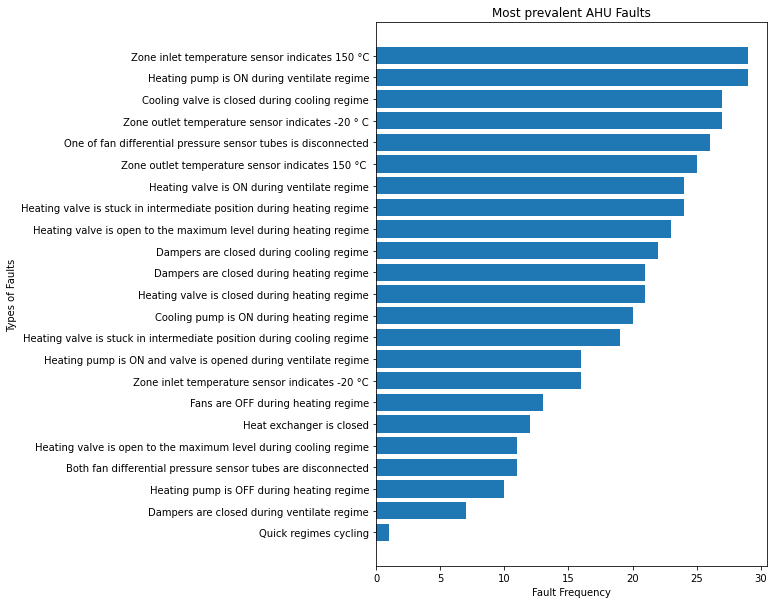

In [371]:
plt.figure(figsize = (7,10))
plt.barh(dt["Faults"],dt["Values"])
plt.title("Most prevalent AHU Faults")
ylabel("Types of Faults")
xlabel("Fault Frequency")
plt.savefig('Fault Frequency.png',dpi=600)

In [205]:
# Bar Chart Feature Importance Decision Tree 
importances = pd.DataFrame({'Random Forest Features':X_train.columns,'Importances Score':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('Importances Score',ascending=False).set_index('Random Forest Features')
importances

,Importances Score
Random Forest Features,
air_temperature__real_value__exahust_air_inlet,0.129
air_temperature__real_value__supply_air_outlet,0.126
water_temperature__real_value__heater_behind,0.120
water_temperature__real_value__heater_before,0.089
water_temperature__real_value__chiller_behind,0.080
signal__required_value__fan_exahust_air,0.079
water_temperature__required_value__heater,0.062
logic__required_value__valve_outdoor_air,0.045
logic__required_value__chiller_pump,0.043


Text(0.5, 0, 'Causes of Faults')

<Figure size 1440x1080 with 0 Axes>

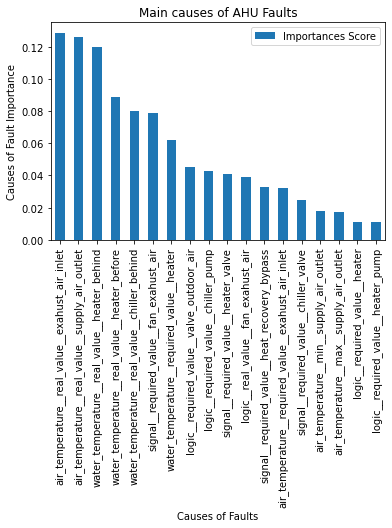

In [206]:
# Bar Chart Feature Importance Decison Tree 
plt.figure(figsize = (20,15))
importances.plot.barh()
plt.title("Main causes of AHU Faults")
ylabel("Causes of Fault Importance")
xlabel("Causes of Faults")

Decision Tree

In [207]:
# Fitting the Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print("The accuracy for the training data set is",acc_decision_tree, "Percent")

The accuracy for the training data set is 100.0 Percent


In [208]:
## Selecting the optimal parameters of the Decision Tree Classifier Model and fitting the model
from sklearn.model_selection import GridSearchCV
from sklearn import tree
parameters = {'max_depth':range(1,50)}
decision_tree_1 = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=3)
decision_tree_1.fit(X_train, y_train)
acc_decision_tree_1 = round(decision_tree_1.score(X_train, y_train) * 100, 2)
tree_model = decision_tree_1.best_estimator_
print("The accuracy for the training data set is",acc_decision_tree_1)

The accuracy for the training data set is 100.0


In [209]:
# Prediction on the test data for decision tree classifier model
decision_tree_pred = decision_tree_1.predict(X_test)
decision_tree_pred

array([0, 0, 0, ..., 0, 0, 0])

In [210]:
# Confusion matrix on decision tree classifier model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
confusion_matrix(y_test, decision_tree_1.predict(X_test))

array([[57410,    10,    21,     5,     7,     6,     3,     3,     1,
            1,     4,     3,     0,     3,     9,    10,    10,     3,
            2,     1,     6,     0,     0,     4],
       [    6,    27,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [   15,     3,    22,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    4,     0,     0,    28,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [   10,     0,     0,     0,    19,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    8,     0,     1,     0,

In [211]:
# Classification report for Decision Tree Classifier on test data
print(classification_report(y_test, decision_tree_1.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57522
           1       0.68      0.82      0.74        33
           2       0.50      0.55      0.52        40
           3       0.85      0.88      0.86        32
           4       0.73      0.66      0.69        29
           5       0.75      0.67      0.71        27
           6       0.91      0.94      0.92        31
           7       0.90      1.00      0.95        26
           8       0.95      0.72      0.82        25
           9       0.97      1.00      0.98        29
          10       0.82      0.62      0.71        29
          11       0.82      0.75      0.78        24
          12       1.00      1.00      1.00        27
          13       0.85      0.96      0.90        23
          14       0.67      0.86      0.75        21
          15       0.55      0.57      0.56        21
          16       0.52      0.48      0.50        23
          17       0.71    

In [212]:
results_dt = pd.DataFrame(decision_tree_1.predict(X_test), columns = ["Faults"])


In [213]:
results_dt['Faults'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
                             ['no fault',
                              'Cooling valve is closed during cooling regime',
                              'Heating valve is ON during ventilate regime',
                              'Heating pump is ON during ventilate regime',
                              'One of fan differential pressure sensor tubes is disconnected',
                              'Dampers are closed during cooling regime',
                              'Heating valve is stuck in intermediate position during heating regime',
                              'Zone outlet temperature sensor indicates 150 °C ',
                              'Heating valve is stuck in intermediate position during cooling regime',
                              'Zone inlet temperature sensor indicates 150 °C',
                              'Dampers are closed during heating regime',
                              'Heating valve is closed during heating regime',
                              'Zone outlet temperature sensor indicates -20 ° C',
                              'Heating valve is open to the maximum level during heating regime',
                              'Cooling pump is ON during heating regime',
                              'Both fan differential pressure sensor tubes are disconnected',
                              'Heating pump is OFF during heating regime',
                              'Fans are OFF during heating regime',
                              'Zone inlet temperature sensor indicates -20 °C',
                              'Heating pump is ON and valve is opened during ventilate regime',
                              'Heat exchanger is closed', 'Quick regimes cycling',
                              'Heating valve is open to the maximum level during cooling regime',
                              'Dampers are closed during ventilate regime'], inplace=True)

In [214]:
results_dt.value_counts()

Faults                                                               
no fault                                                                 57514
Heating valve is ON during ventilate regime                                 44
Cooling valve is closed during cooling regime                               40
Heating pump is ON during ventilate regime                                  33
Heating valve is stuck in intermediate position during heating regime       32
Zone inlet temperature sensor indicates 150 °C                              30
Zone outlet temperature sensor indicates 150 °C                             29
Cooling pump is ON during heating regime                                    27
Zone outlet temperature sensor indicates -20 ° C                            27
One of fan differential pressure sensor tubes is disconnected               26
Heating valve is open to the maximum level during heating regime            26
Dampers are closed during cooling regime                     

In [ ]:
results_

In [219]:
#Scaling the results
results_dt

,Faults
0,no fault
1,no fault
2,no fault
3,no fault
4,no fault
...,...
58048,no fault
58049,no fault
58050,no fault
58051,no fault


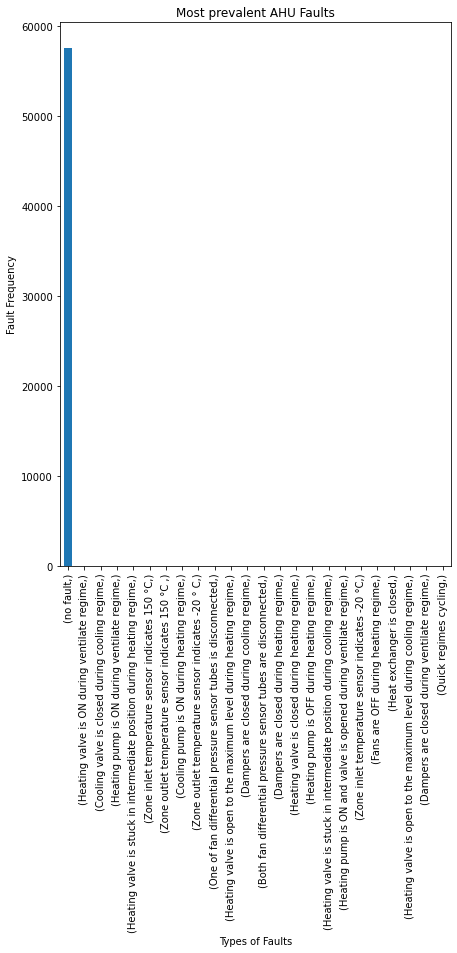

In [215]:
plt.figure(figsize = (7,10))
results_dt.value_counts().plot.bar()
plt.title("Most prevalent AHU Faults")
ylabel("Fault Frequency")
xlabel("Types of Faults")
plt.savefig('Fault Frequency.png',dpi=600)

In [216]:
# Bar Chart Feature Importance Decision Tree 
importances = pd.DataFrame({'Decision Tree Features':X_train.columns,'Importances Score':np.round(decision_tree.feature_importances_,3)})
importances = importances.sort_values('Importances Score',ascending=False).set_index('Decision Tree Features')
importances

,Importances Score
Decision Tree Features,
air_temperature__real_value__exahust_air_inlet,0.170
air_temperature__real_value__supply_air_outlet,0.164
water_temperature__real_value__chiller_behind,0.138
water_temperature__real_value__heater_behind,0.136
water_temperature__real_value__heater_before,0.083
logic__required_value__chiller_pump,0.054
air_temperature__required_value__exahust_air_inlet,0.049
signal__required_value__heater_valve,0.043
signal__required_value__fan_exahust_air,0.043


SVC

In [217]:
# Support Vector Machine Classifer Model
from sklearn.svm import SVC, LinearSVC
svc = SVC(kernel = "linear", random_state = 42)
svc.fit(X_train,y_train)
accuracy = round(svc.score(X_train,y_train)*100,2)
print("The accuracy for the training data set is:",round(svc.score(X_train,y_train)*100,2), "percent")

The accuracy for the training data set is: 99.44 percent


In [218]:
## Selecting the optimal parameters for the Support Vector Machines Classifier Model
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"C":[0.5,1,10,100],
    "gamma":["scale",1,0.1,0.01,0.001,0.0001],
    "kernel":["rbf","linear"],}
]

optimal_svc = GridSearchCV(
SVC(),
param_grid,
cv = 5,
scoring = "accuracy"
)

optimal_svc.fit(X_train, y_train)
print(optimal_svc.best_params_)

KeyboardInterrupt: 

In [ ]:
## Fitting the Support Vector Machines Classifier Model with the optimal parameters
svc_optimal = SVC(kernel = "rbf",C= 100, gamma = 0.1, random_state = 42)
svc_optimal.fit(X_train,y_train)
accuracy_optimal = round(svc_optimal.score(X_train,y_train)*100,2)
print("The accuracy for the optimal model is:",round(svc_optimal.score(X_train,y_train)*100,2), "percent")

In [ ]:
# Prediction on the test data for Support Vector Machines Classifier model
svc_pred = svc_optimal.predict(X_test)
svc_pred

In [ ]:
# Confusion matrix on Support Vector Machines Classifier model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
confusion_matrix(y_test, svc_optimal.predict(X_test))

In [71]:
# Classification report for Support Vector Machines Classifier on test data
print(classification_report(y_test, svc_optimal.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57522
           1       0.95      0.58      0.72        33
           2       0.71      0.50      0.59        40
           3       0.93      0.78      0.85        32
           4       0.60      0.41      0.49        29
           5       1.00      0.85      0.92        27
           6       0.96      0.87      0.92        31
           7       0.96      1.00      0.98        26
           8       1.00      0.68      0.81        25
           9       1.00      0.97      0.98        29
          10       1.00      0.93      0.96        29
          11       1.00      0.88      0.93        24
          12       1.00      0.96      0.98        27
          13       0.95      0.91      0.93        23
          14       1.00      0.95      0.98        21
          15       0.00      0.00      0.00        21
          16       1.00      0.65      0.79        23
          17       1.00    

In [72]:
## Getting the coefficients from Support Vector Machine Classifier
svc_optimal.coef_trans = np.array(svc_optimal.coef_)

AttributeError: coef_ is only available when using a linear kernel

In [ ]:
## Converting the coefficients to one dimension
svc_optimal_one_dim = svc_optimal.coef_trans.ravel()
svc_optimal_one_dim

In [ ]:
## Extracting the feature names
columns = X_train.columns
columns

In [ ]:
results_svc = pd.DataFrame(svc_optimal.predict(X_test), columns = ["Faults"])
results_svc.value_counts()

In [ ]:
plt.figure(figsize = (7,10))
results_svc.value_counts().plot.bar()
plt.title("Most prevalent AHU Faults")
ylabel("Fault Frequency")
xlabel("Types of Faults")
plt.savefig('Fault Frequency.png',dpi=600)

In [ ]:
## Plotting the features using the below function
def f_importances(coef, columns):
    imp = coef
    imp,columns = zip(*sorted(zip(imp,columns)))
    plt.barh(range(len(columns)), imp, align='center')
    plt.yticks(range(len(columns)), columns)
    plt.title("Plot showing important features from Support Vector Machine Classifier Optimal Model")
    plt.show()
plt.figure(figsize = (20,10))
features_names = columns
svc_optimal = SVC(kernel = "linear",C= 100, gamma = 0.0001, random_state = 42)
svc_optimal.fit(X_train,y_train)
f_importances(svc_optimal_one_dim,columns)

LSTM

In [114]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout 

In [134]:
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(sampling_strategy= "all")
X_smote, y_smote = under_sample.fit_resample(new_data,multi_target)
y_smote = pd.Series(y_smote)
y_smote.value_counts()

0     24
1     24
22    24
21    24
20    24
19    24
18    24
17    24
16    24
15    24
14    24
13    24
12    24
11    24
10    24
9     24
8     24
7     24
6     24
5     24
4     24
3     24
2     24
23    24
Name: fault, dtype: int64

In [135]:
# encode class values as integers
import tensorflow as tf
y_smote = tf.keras.utils.to_categorical(y_smote, num_classes =24)

In [136]:
# Scaling the data set to normalise it
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(X_smote),columns = new_data.columns)

In [137]:
# Splitting the data set into train and test by 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y_smote, test_size=0.3, random_state=42) 

In [138]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(403, 18) (403, 24)
(173, 18) (173, 24)


In [139]:
# Convert x_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [140]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train.shape

(403, 18, 1)

In [141]:
# Convert x_train and y_train to numpy arrays
X_test, y_test = np.array(X_test), np.array(y_test)

In [142]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_test.shape

(173, 18, 1)

In [143]:
# Building the LSTM Model
model = Sequential()
model.add(LSTM(units = 120, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))


model.add(LSTM(units = 15, activation = "softmax", return_sequences = False))
model.add(Dropout(0.5))

model.add(Dense(24))

In [144]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 18, 120)           58560     
_________________________________________________________________
dropout_10 (Dropout)         (None, 18, 120)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 18, 60)            43440     
_________________________________________________________________
dropout_11 (Dropout)         (None, 18, 60)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 15)                4560      
_________________________________________________________________
dropout_12 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)               

In [145]:
# Compile the model
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=['accuracy'])

In [146]:
model.fit(X_train, y_train, batch_size=16, epochs=50)

Epoch 1/50
26/26 [==============================] - 3s 15ms/step - loss: 8.3010 - accuracy: 0.0496
Epoch 2/50
26/26 [==============================] - 0s 13ms/step - loss: 8.6718 - accuracy: 0.0372
Epoch 3/50
26/26 [==============================] - 0s 13ms/step - loss: 8.4563 - accuracy: 0.0546
Epoch 4/50
26/26 [==============================] - 0s 13ms/step - loss: 7.8061 - accuracy: 0.0298
Epoch 5/50
26/26 [==============================] - 0s 13ms/step - loss: 8.1804 - accuracy: 0.0372
Epoch 6/50
26/26 [==============================] - 0s 14ms/step - loss: 7.8306 - accuracy: 0.0620
Epoch 7/50
26/26 [==============================] - 0s 13ms/step - loss: 7.9848 - accuracy: 0.0273
Epoch 8/50
26/26 [==============================] - 0s 13ms/step - loss: 8.6382 - accuracy: 0.0298
Epoch 9/50
26/26 [==============================] - 0s 13ms/step - loss: 8.4771 - accuracy: 0.0447
Epoch 10/50
26/26 [==============================] - 0s 13ms/step - loss: 7.3322 - accuracy: 0.0471
Epoch 11/

In [147]:
# Evaluating the base line model
model.evaluate(X_train,y_train)

13/13 [==============================] - 0s 5ms/step - loss: 7.5991 - accuracy: 0.0447


[7.599102973937988, 0.04466501250863075]

In [148]:
test_loss, test_acc = model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 5ms/step - loss: 6.8944 - accuracy: 0.0347


In [149]:
Predictions = model.predict(X_test)

In [150]:
# Converting the sigmoid output values to the original classes
predicted_output =np.where(Predictions == Predictions.max(axis=1)[:, np.newaxis], 1, 0)
predicted_output

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [151]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
print(classification_report(y_test, predicted_output))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00         7
          17       0.00    

/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
import keras_tuner as tf
from tensorflow import keras
from keras_tuner import RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
np.random.seed(42)

In [166]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int("num_of_layers", 2, 20)):
        model.add(layers.Dense(units = hp.Int("units",
                                 min_value = 32,
                                 max_value = 512,
                                 step = 16),
                        activation = "relu"))
    
    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5))),
    model.add(layers.Dense(24, activation = "softmax")),
    model.compile(
        optimizer = keras.optimizers.Adam(
            hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss = "categorical_crossentropy",
        metrics = ["accuracy"])
    return model

In [167]:
tuner = tf.RandomSearch(
    build_model,
    objective="accuracy",
    max_trials=10,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="Thesis",
)

In [161]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(403, 18, 1) (403, 24)
(173, 18, 1) (173, 24)


In [171]:
tuner.search(X_train.shape[0], X_train.shape[1],
             epochs=30, batch_size = 16,
             validation_data=(X_test, y_test))


Search: Running Trial #3

Hyperparameter    |Value             |Best Value So Far 
num_of_layers     |16                |?                 
units             |224               |?                 
dropout_rate      |0.3029            |?                 
learning_rate     |0.001             |?                 



IndexError: list index out of range

In [ ]:
tuner.results_summary(1)

In [ ]:
# Building the LSTM Model
model = Sequential()
model.add(LSTM(units = 320, activation = "relu", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.41))

model.add(LSTM(units = 320, activation = "relu", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.41))

model.add(LSTM(units = 320, activation = "relu", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.41))

model.add(LSTM(units = 320, activation = "softmax", return_sequences = False))
model.add(Dropout(0.41))

model.add(Dense(22))

In [ ]:
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics=['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='lr', factor=0.2,
                              patience=5, min_lr=0.001)

In [ ]:
# Training the model
model.fit(x_train, y_train, batch_size=32, epochs=50, callbacks=[reduce_lr])

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
model.evaluate(x_train,y_train)